In [4]:
#mounting drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
#installing h2o package
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#Importing h2o automl
import h2o
from h2o.automl import H2OAutoML

#Initialise h2o
h2o.init()

# Import data
f = "/content/drive/My Drive/day.csv"
df = h2o.import_file(f)

# Reponse column
y = "cnt"
#removing the columns instant as it is index, date, count of casual and registered.
x=df.columns
x.remove(y)
x.remove("instant")
x.remove("dteday")
x.remove("casual")
x.remove("registered")

# Split into train & test
splits = df.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]



Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  ----------------------------------
H2O_cluster_uptime:         2 mins 12 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.2
H2O_cluster_version_age:    5 days
H2O_cluster_name:           H2O_from_python_unknownUser_gb467k
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  ----------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                    rmse     mse      mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  -------  ------  -------  --------  ------------------------  ------------------  -------------------------  ---------------
XGBoost_grid_1_AutoML_1_20230315_105904_model_7          681.761  464798  477.944  0.226944                    464798                 245                   0.009718  XGBoost
StackedEnsemble_BestOfFamily_4_AutoML_1_20230315_105904  686.273  470970  463.034  0.222515                    470970                 147                   0.551172  StackedEnsemble
GBM_grid_1_AutoML_1_20230315_105904_model_2              686.694  471549  476.466  0.223194                    471549                 180                   0.049775  GBM
StackedEnsemble_AllModels_3_AutoML_1_20230315_105904     690.826  477241  468.6    0.220552                    477241                 295                   0.387439  StackedEnsemble
GBM_grid_1_AutoML_1_20230315_105904_model_5              697.168  486043  470.803  0.230414                    486043                 223                   0.019523  GBM
GBM_2_AutoML_1_20230315_105904                           704.205  495904  481.976  0.233554                    495904                 296                   0.153763  GBM
GBM_grid_1_AutoML_1_20230315_105904_model_3              704.968  496979  493.514  0.226412                    496979                 174                   0.055351  GBM
StackedEnsemble_AllModels_2_AutoML_1_20230315_105904     708.342  501748  475.152  0.226977                    501748                 289                   0.621739  StackedEnsemble
XGBoost_grid_1_AutoML_1_20230315_105904_model_2          708.362  501777  500.027  0.241927                    501777                 499                   0.010676  XGBoost
StackedEnsemble_BestOfFamily_3_AutoML_1_20230315_105904  709.662  503620  474.924  0.228344                    503620                 256                   0.257056  StackedEnsemble
GBM_5_AutoML_1_20230315_105904                           712.352  507446  493.318  0.237825                    507446                 213                   0.241597  GBM
GBM_3_AutoML_1_20230315_105904                           714.485  510489  497.367  0.23268                     510489                 241                   0.064085  GBM
StackedEnsemble_AllModels_1_AutoML_1_20230315_105904     716.062  512745  481.947  0.229252                    512745                 315                   0.212866  StackedEnsemble
XGBoost_3_AutoML_1_20230315_105904                       717.333  514566  499.827  0.245668                    514566                 454                   0.050805  XGBoost
StackedEnsemble_BestOfFamily_2_AutoML_1_20230315_105904  717.931  515424  482.091  0.231303                    515424                 152                   0.125964  StackedEnsemble
GBM_4_AutoML_1_20230315_105904                           721.362  520364  489.425  0.235171                    520364                 294                   0.13815   GBM
XGBoost_grid_1_AutoML_1_20230315_105904_model_4          734.601  539639  512.2    0.221314                    539639                 256                   0.125684  XGBoost
DRF_1_AutoML_1_20230315_105904                           748.41   560118  517.724  0.257692                    560118                 493                   0.056815  DRF
StackedEnsemble_BestOfFamily_1_AutoML_1_20230315_105904  750.313  562970  512.777  0.228172                    562970                 346                   0.05625   StackedEnsemble
GBM_grid_1_AutoML_1_20230315_105904_model_4              750.602  563403  533.795  0.244205                    563403                 245                   0.173225  GBM
[20 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

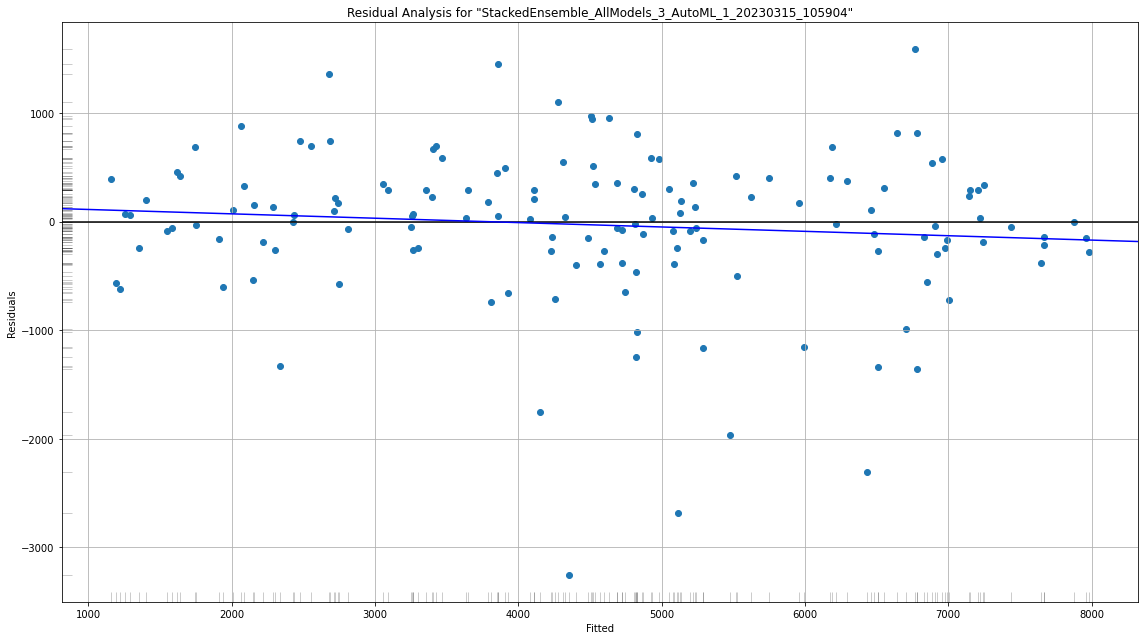

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

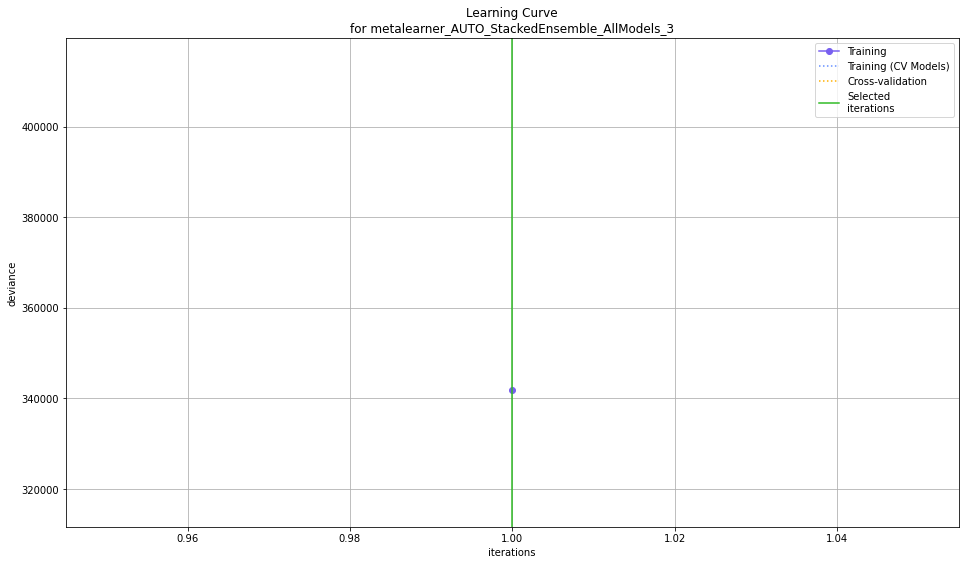

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

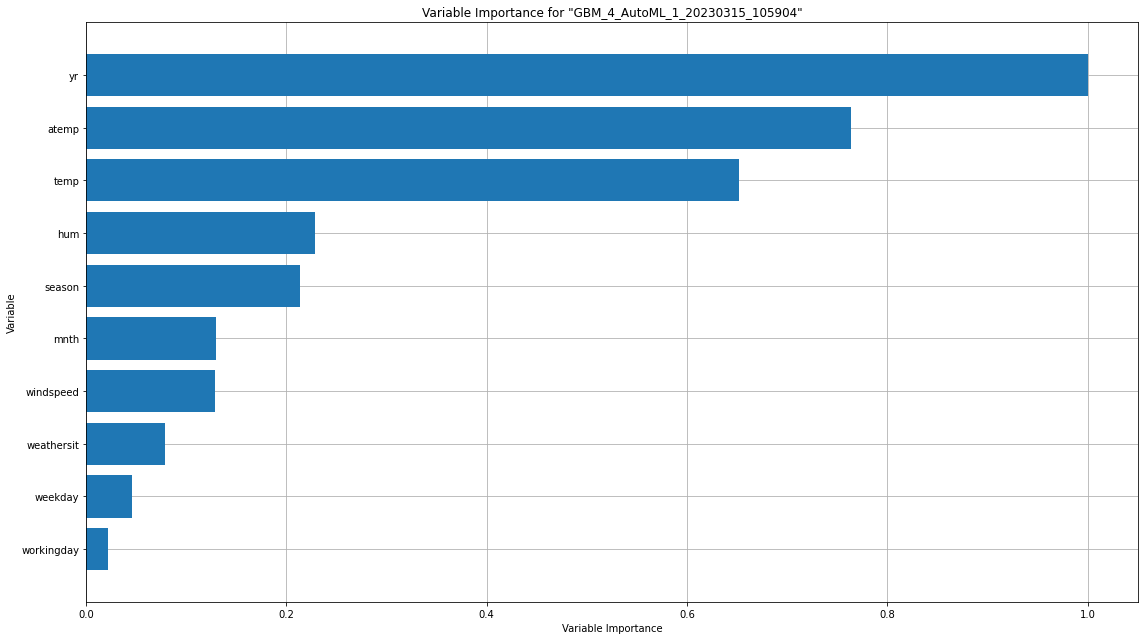

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

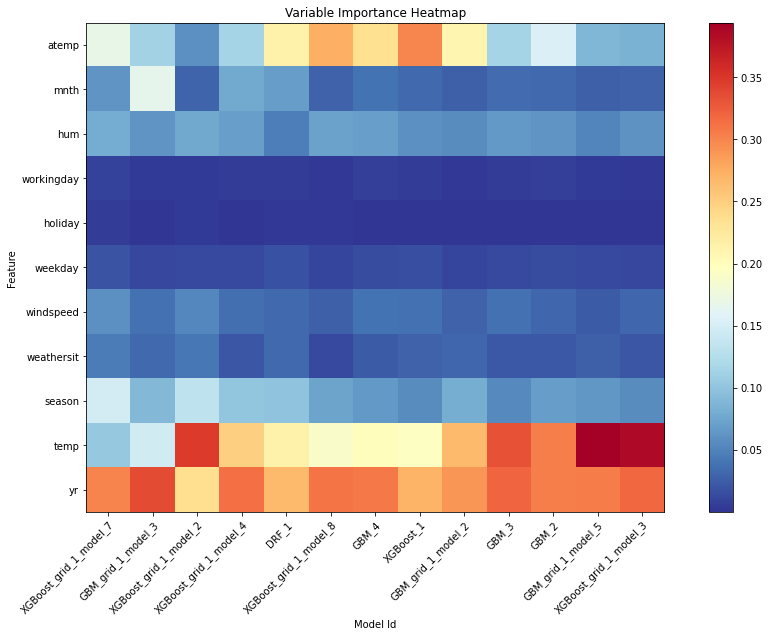

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

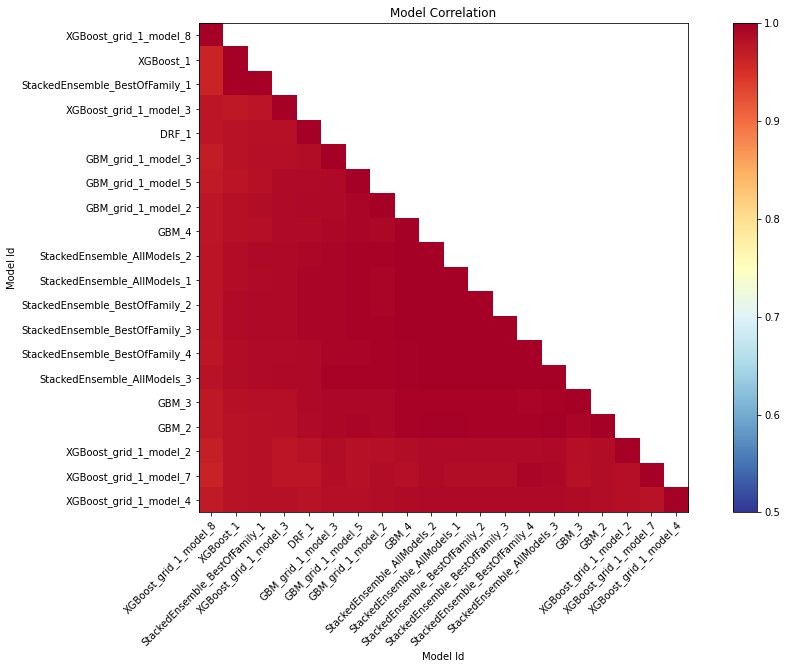

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

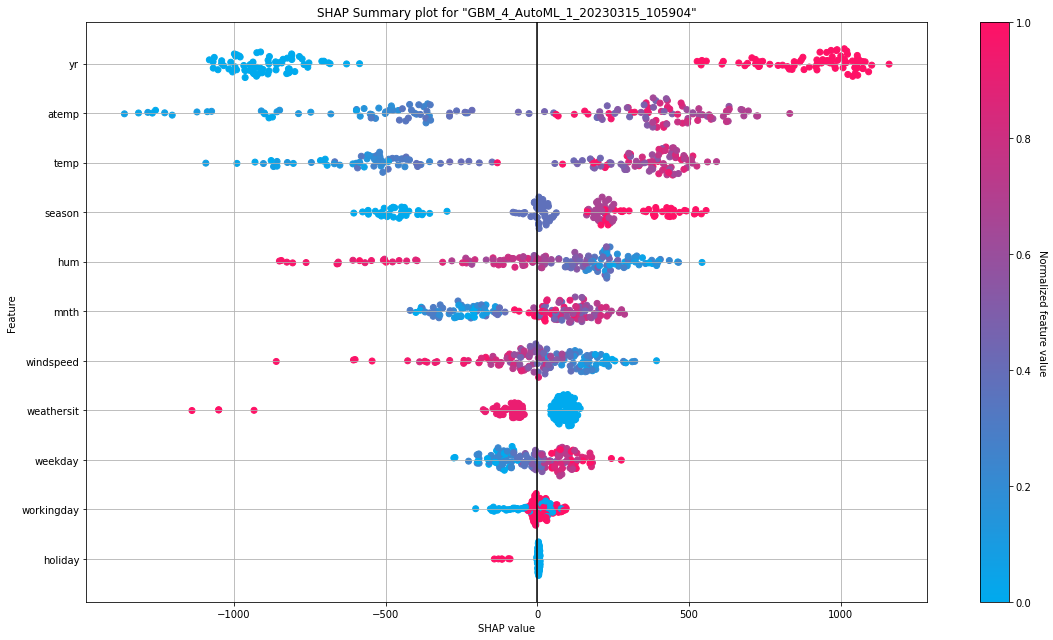

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

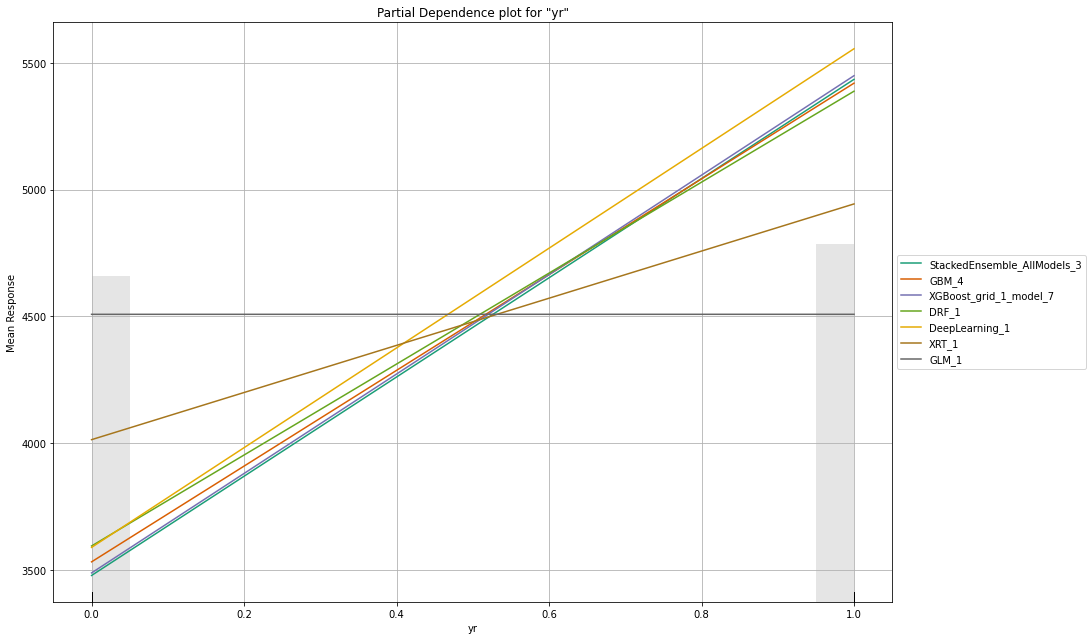

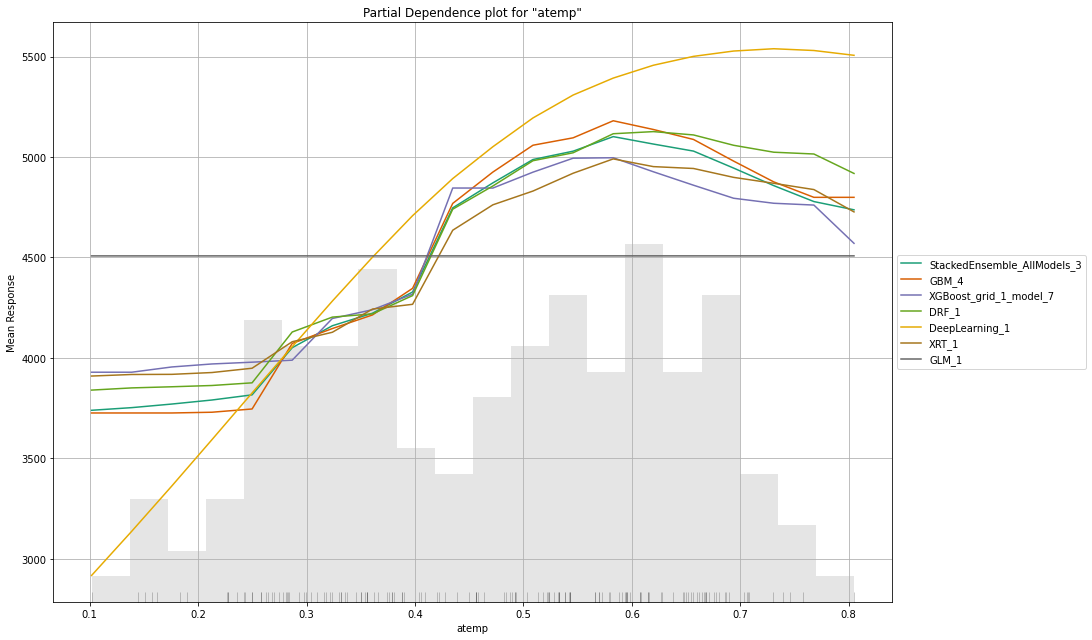

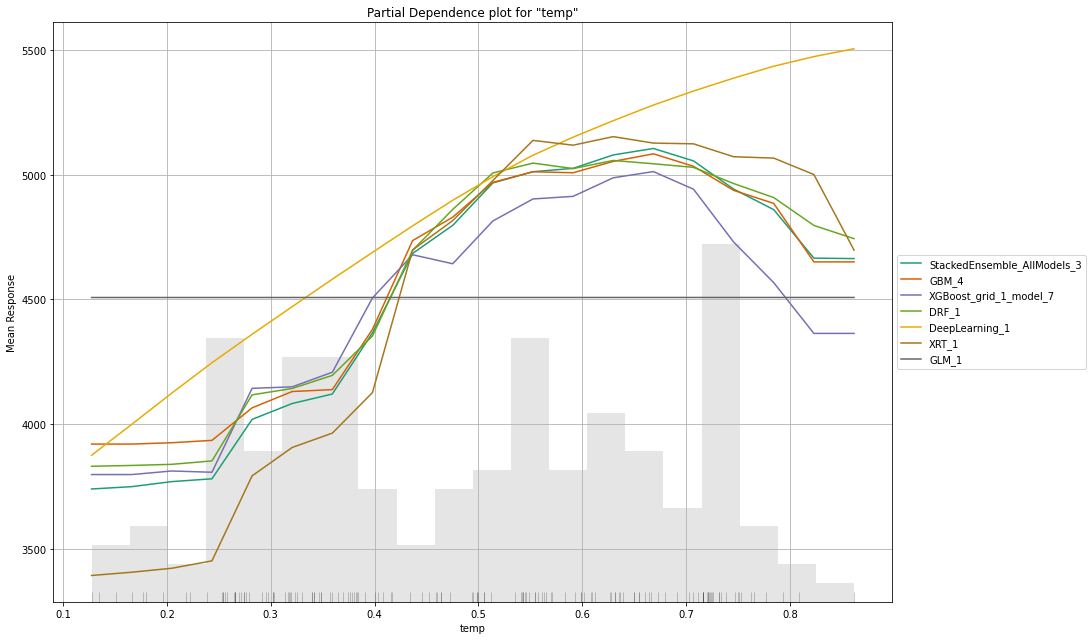

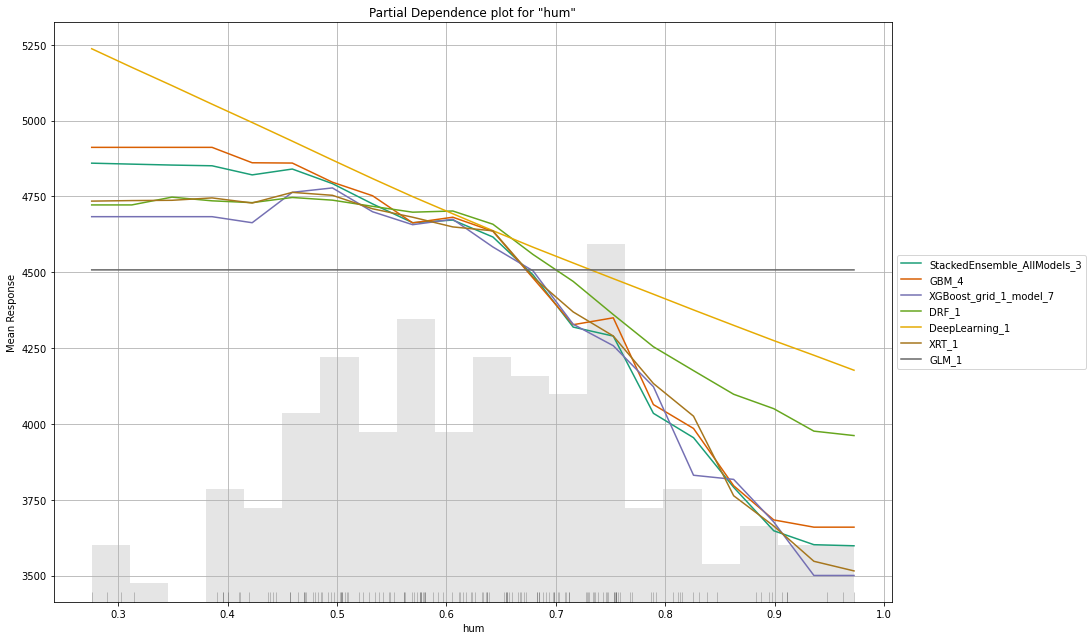

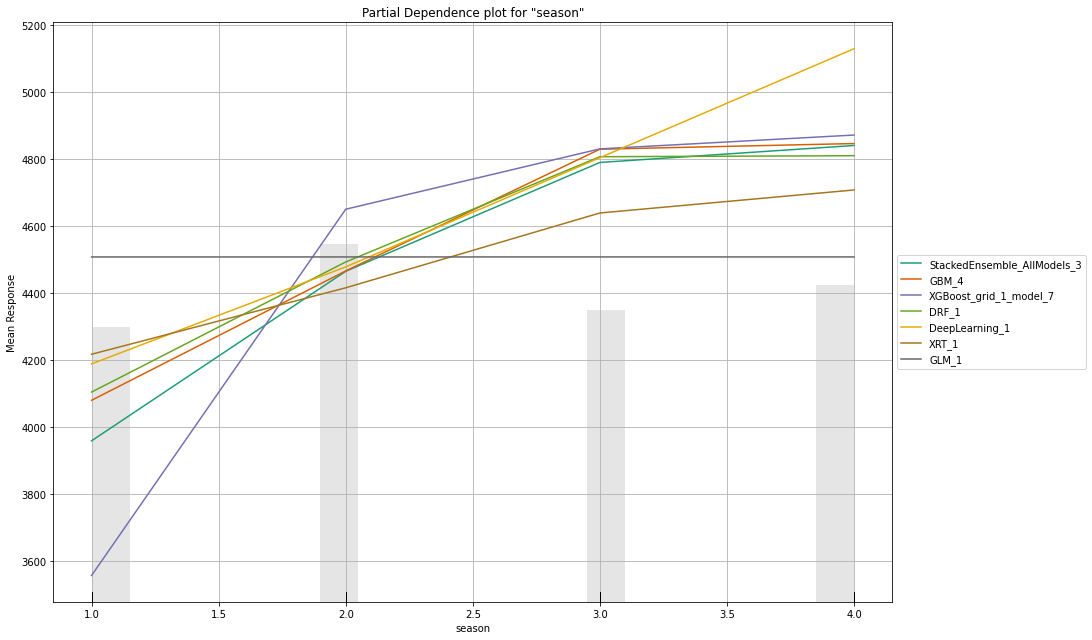

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

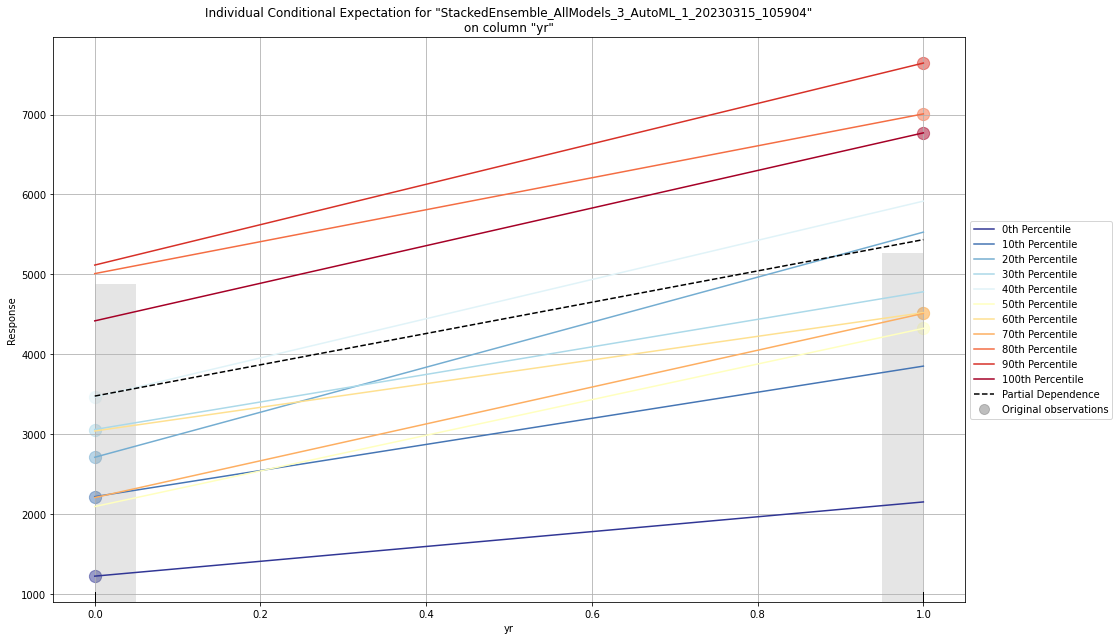

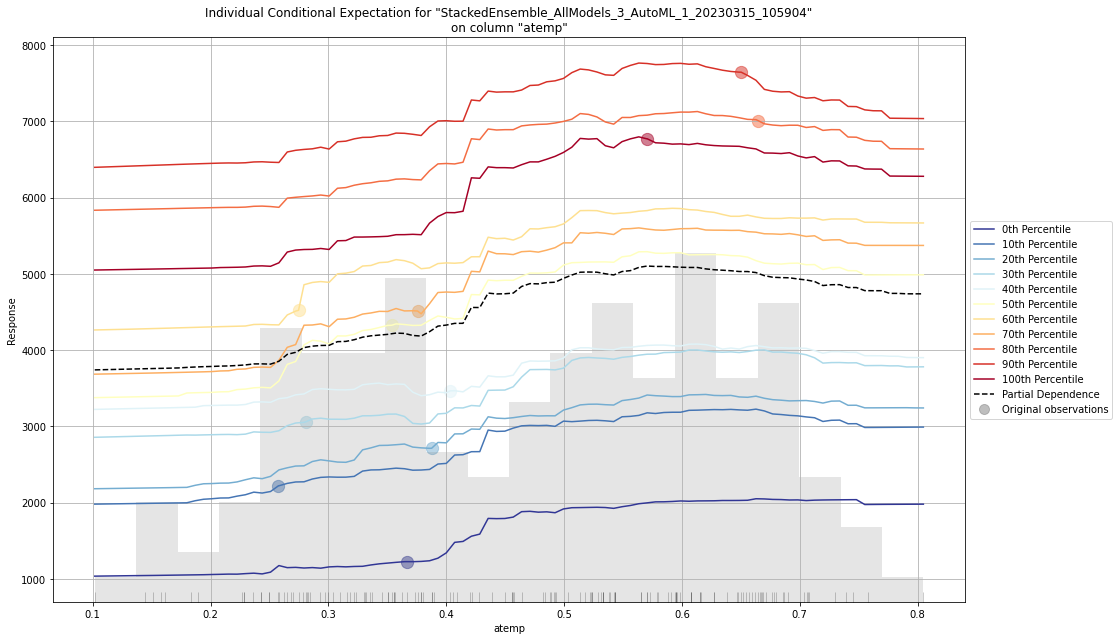

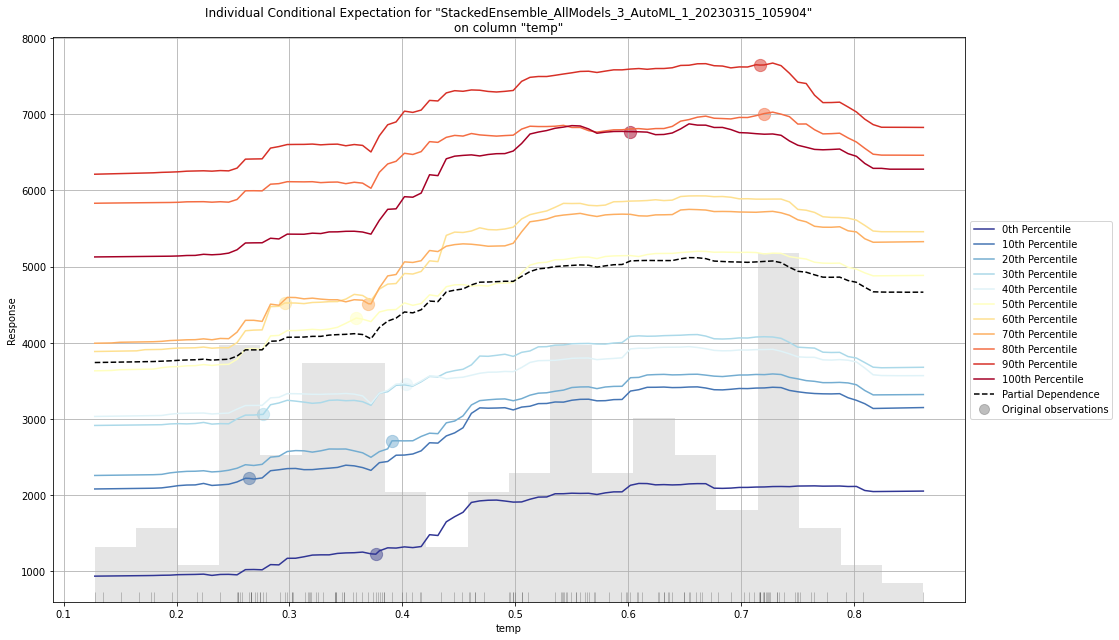

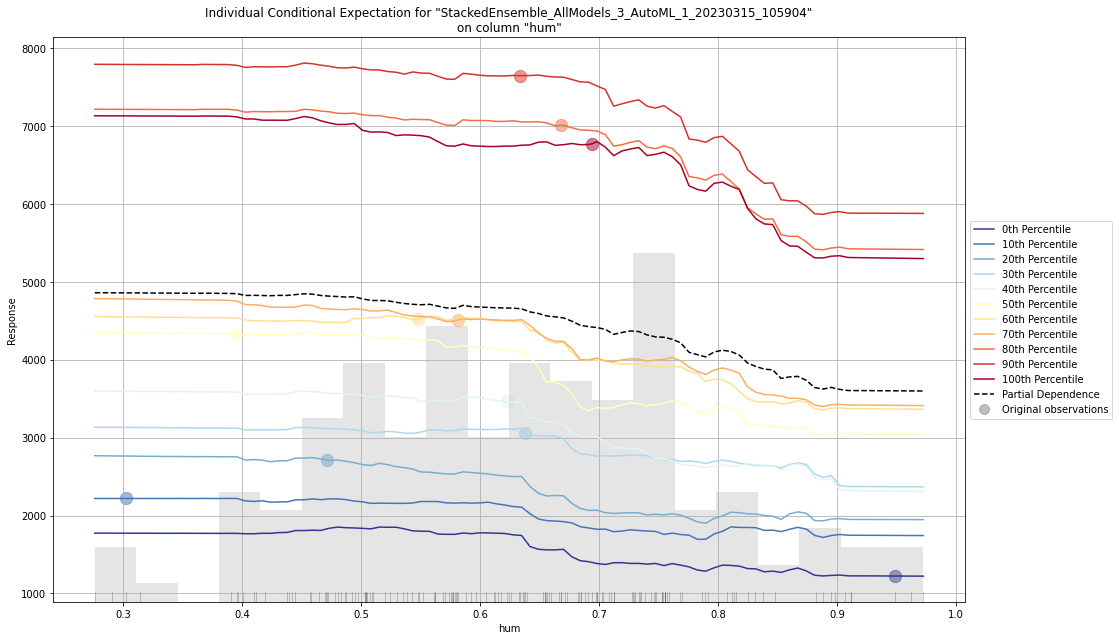

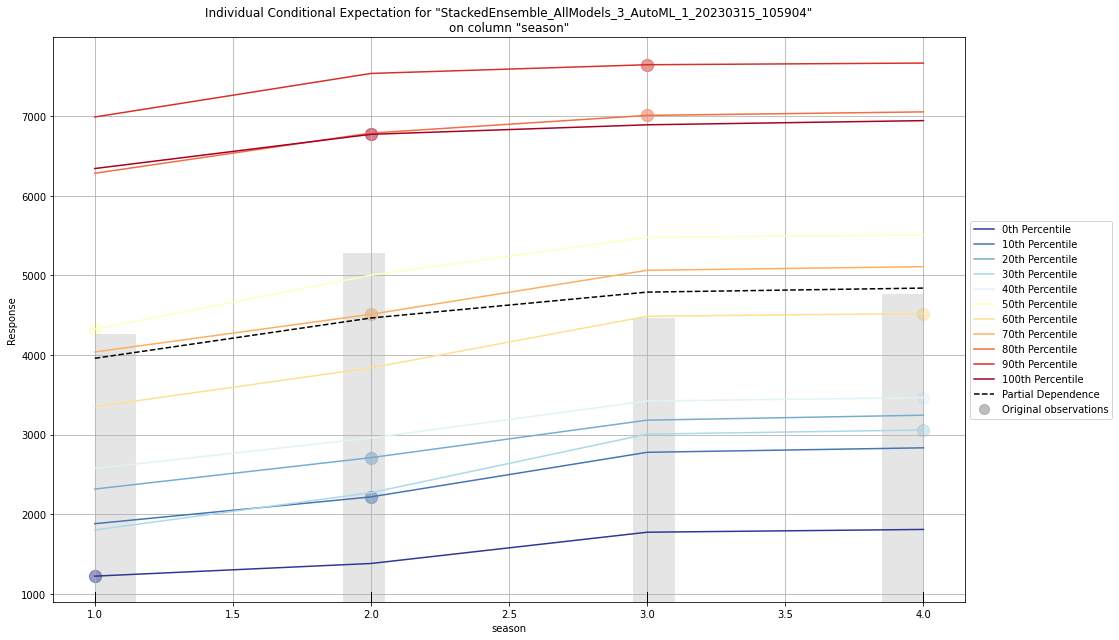

In [7]:
# Run AutoML for 1 minute
aml = H2OAutoML(max_runtime_secs=60, seed=1)
aml.train(x=x,y=y, training_frame=train)

# Explain AutoML models
exa = aml.explain(test)



In [8]:
# As per above AutoML model explained the different models using XGBOOST,GBM and Stacked Ensemble models.
## Varible importance and variable importance heat map shows year has more influence followed temperature,humidity,season on the target variable.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

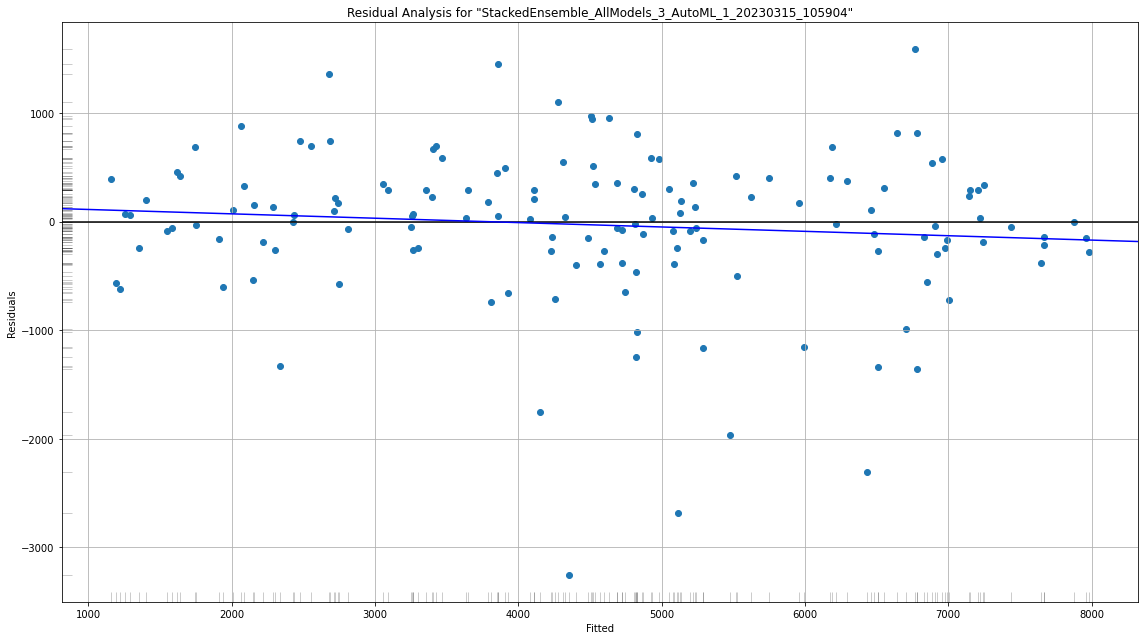

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

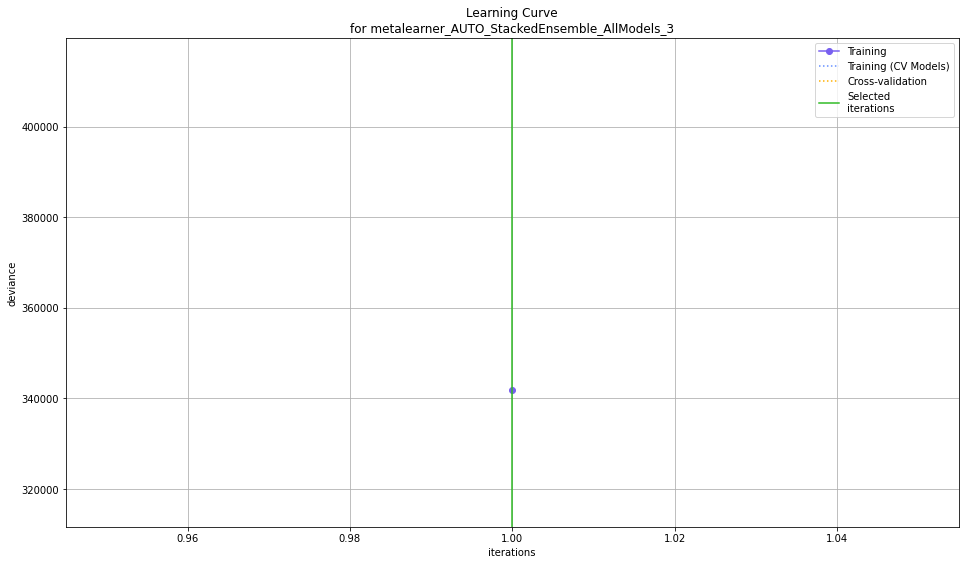

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

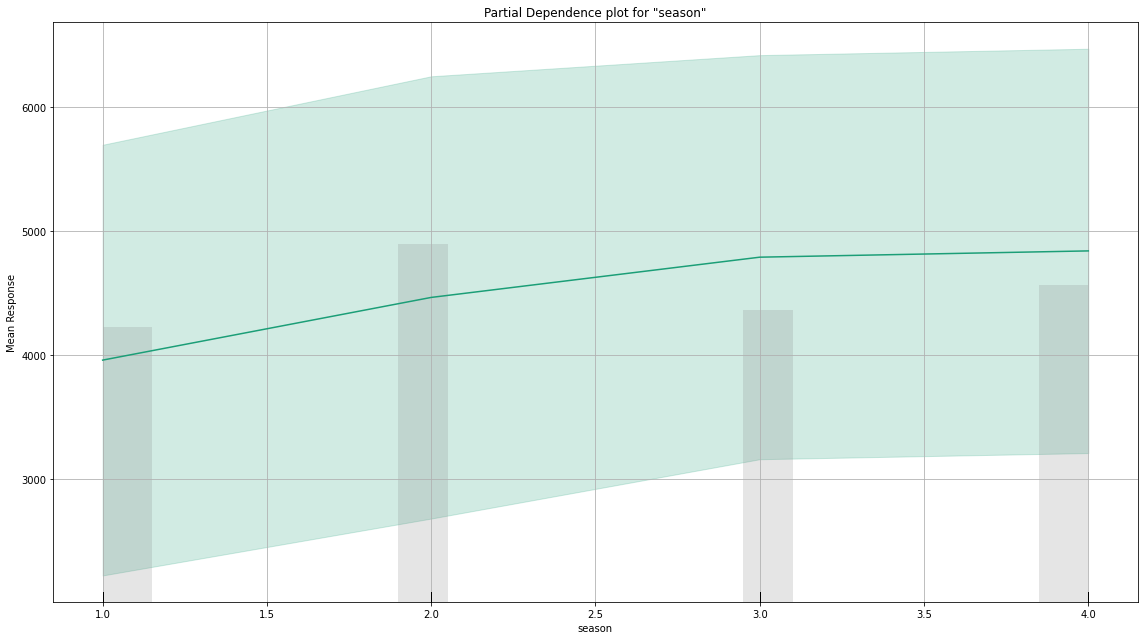

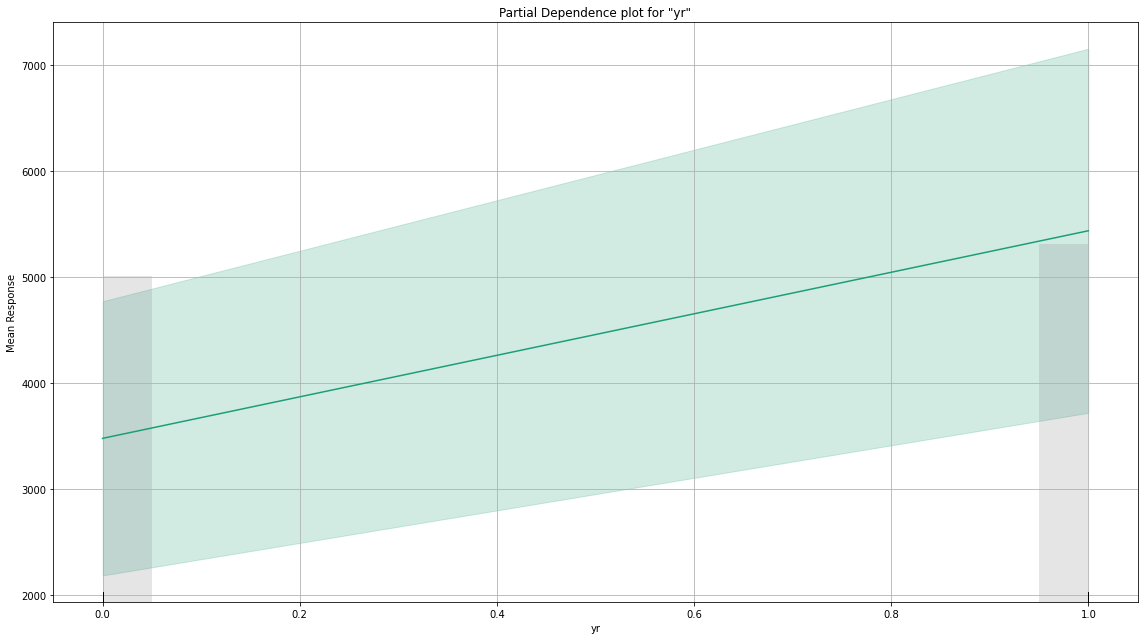

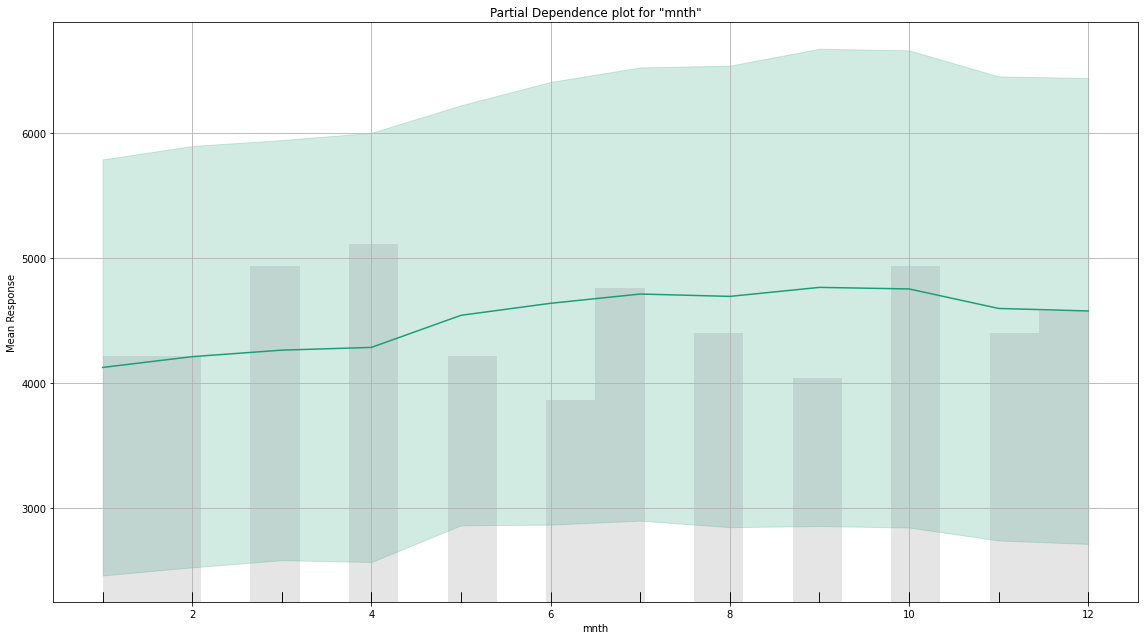

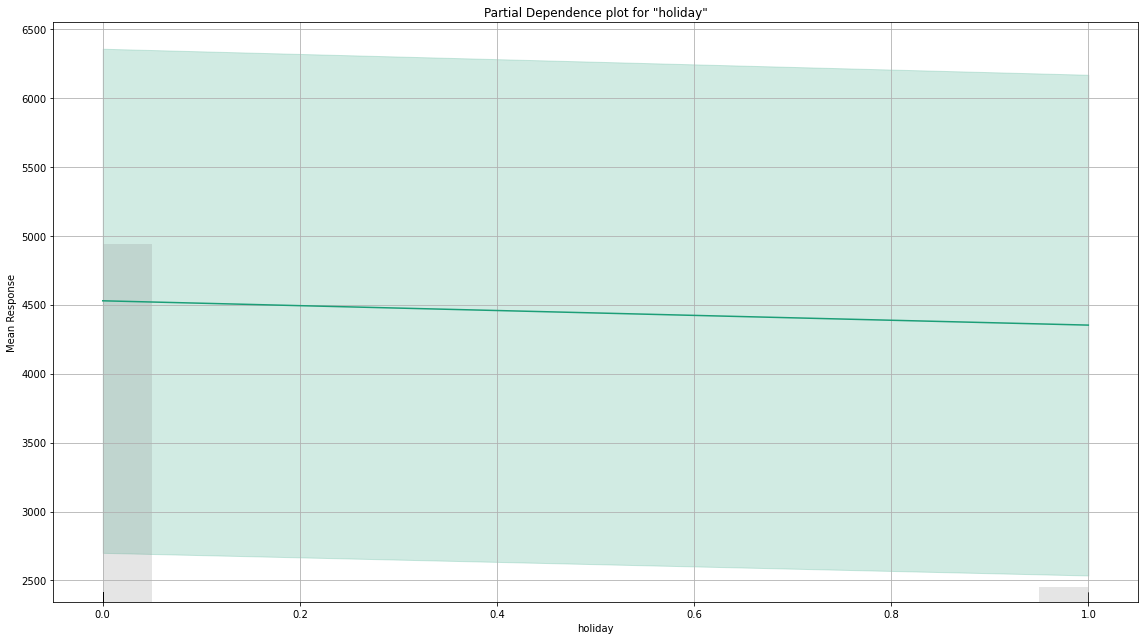

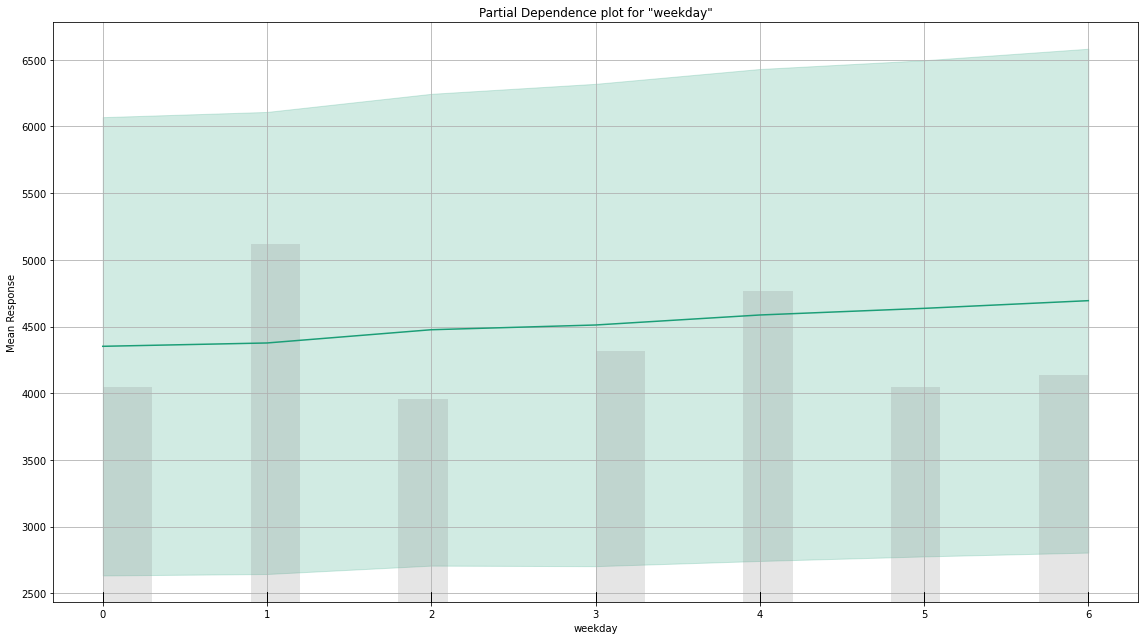

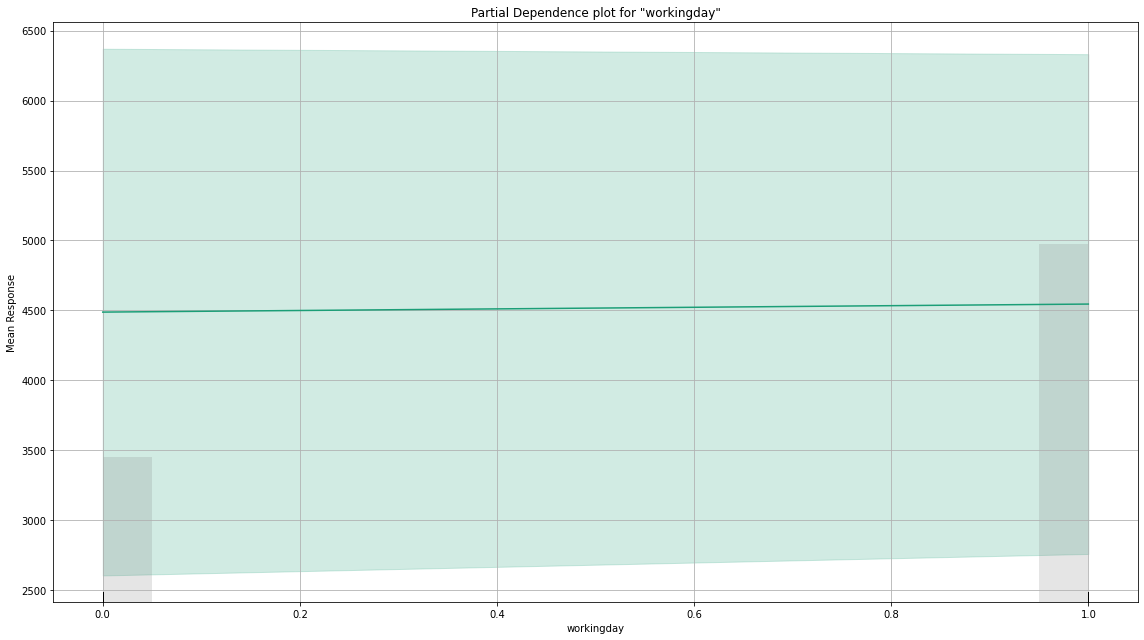

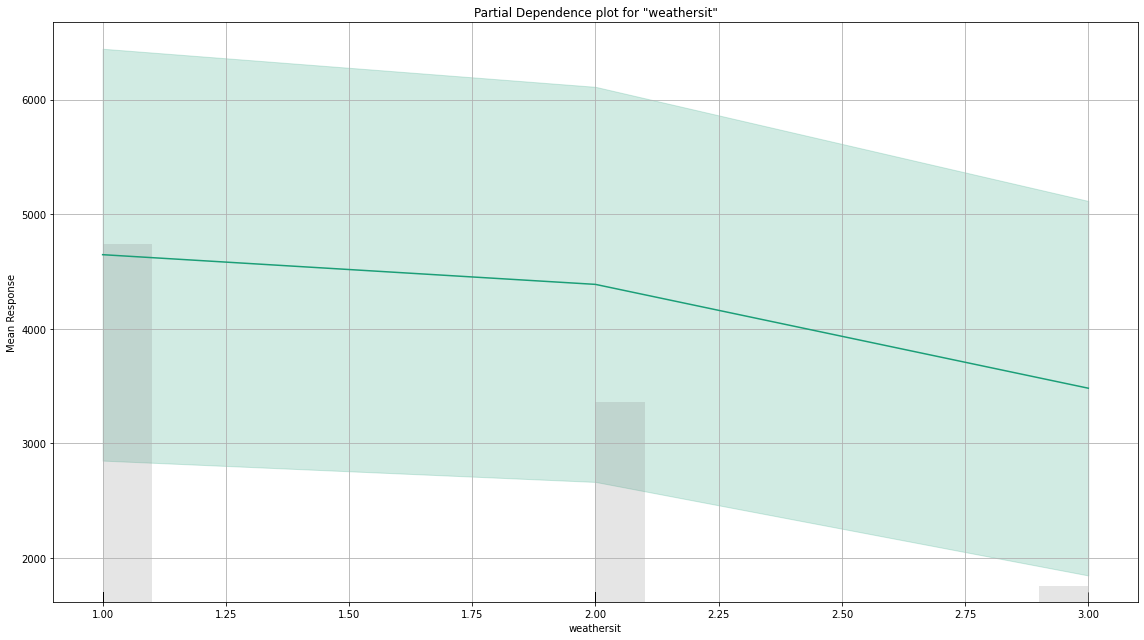

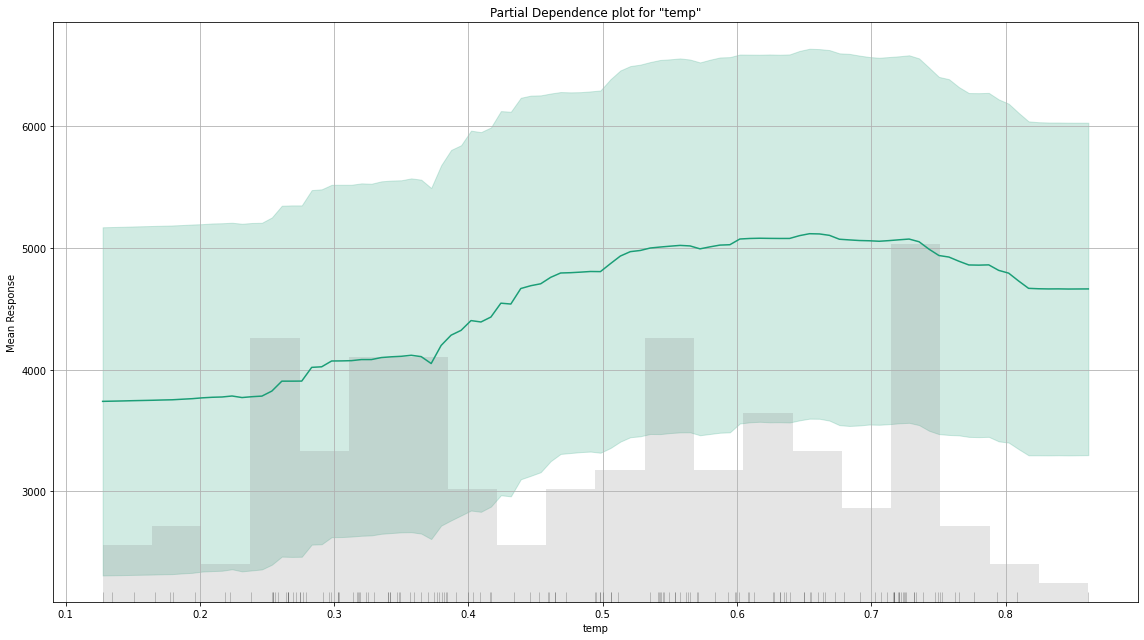

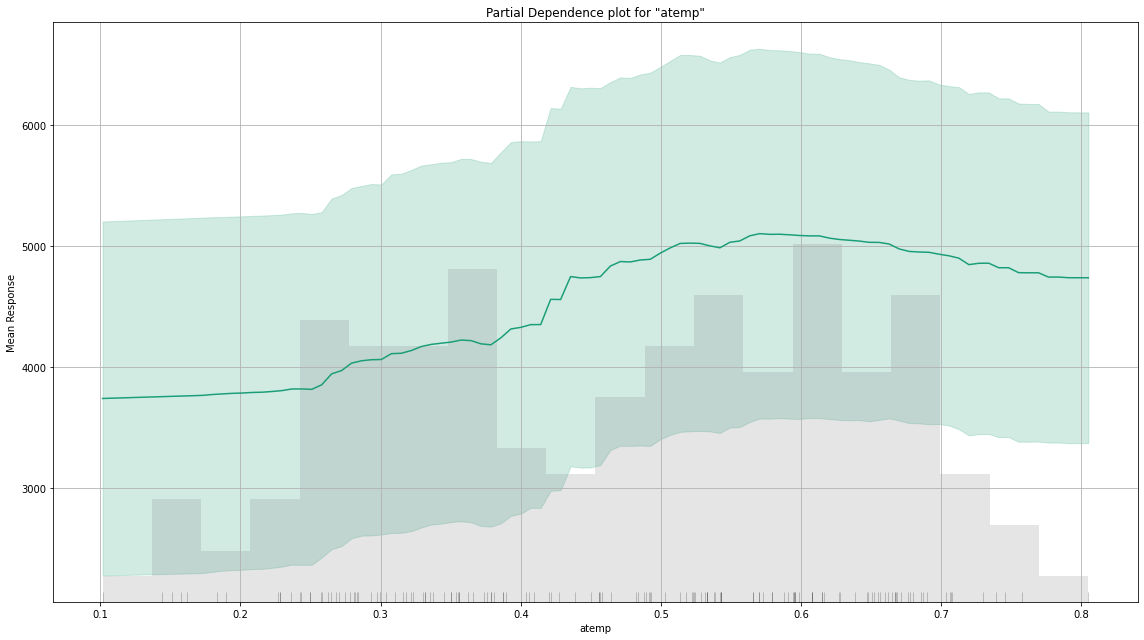

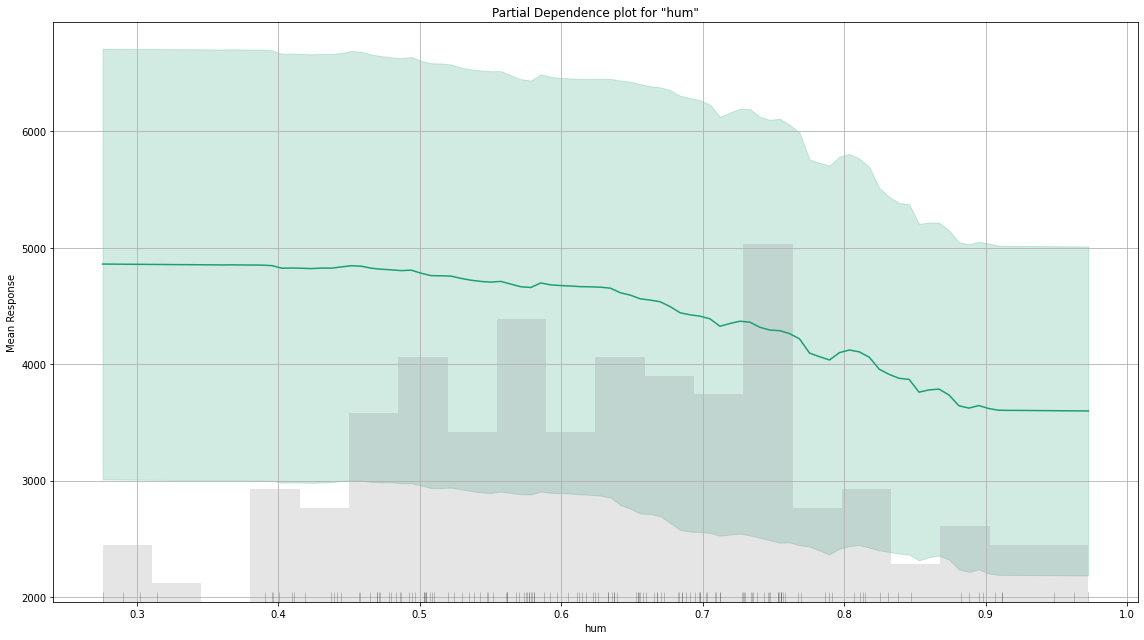

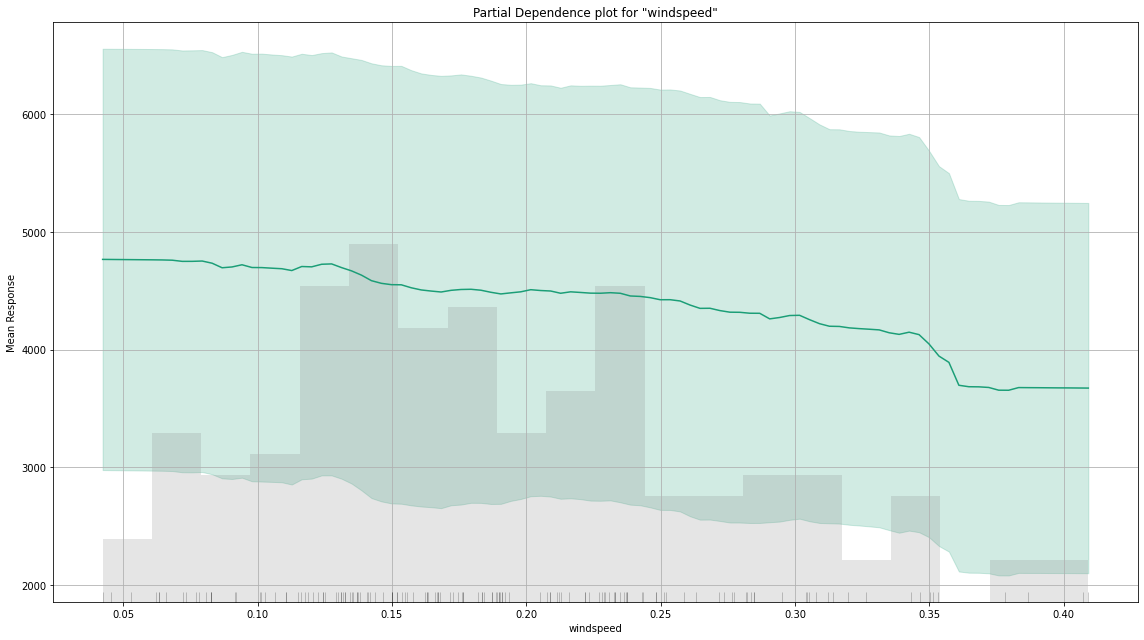

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

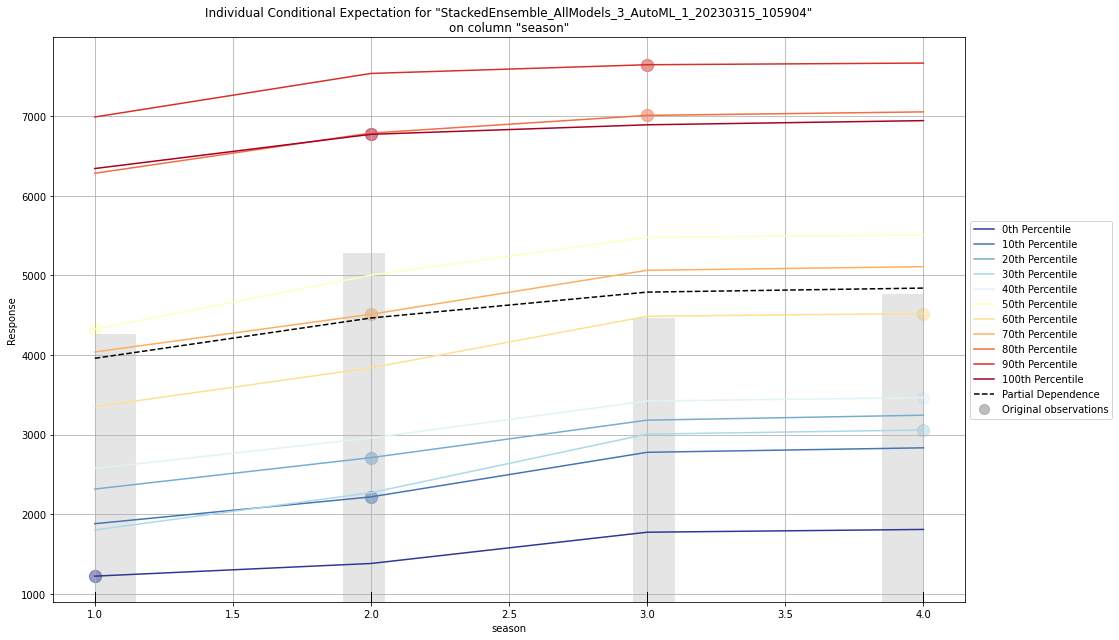

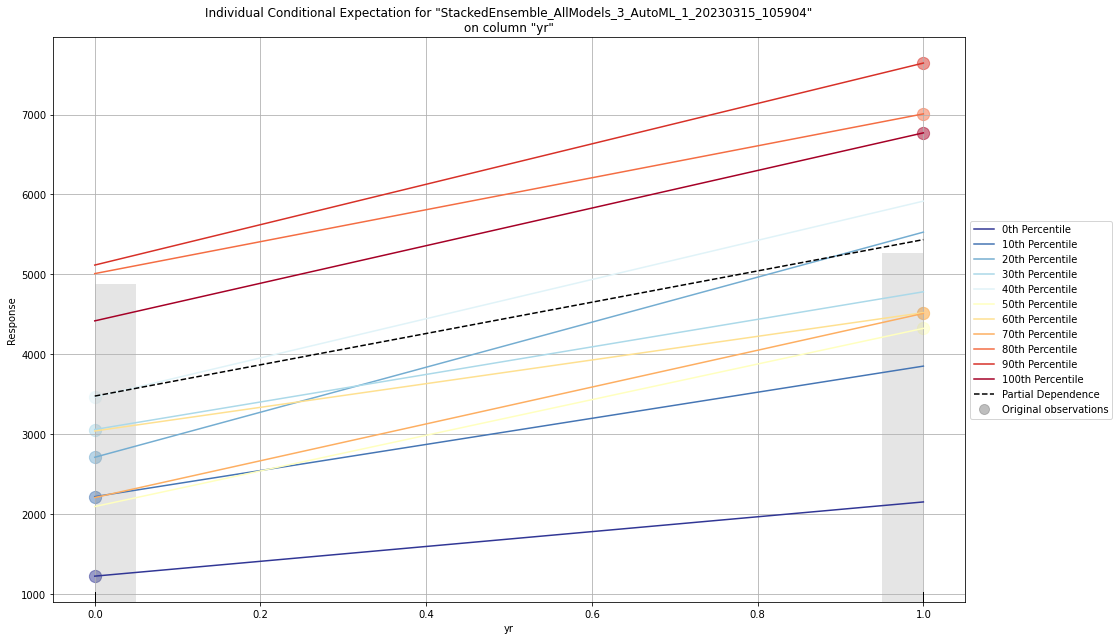

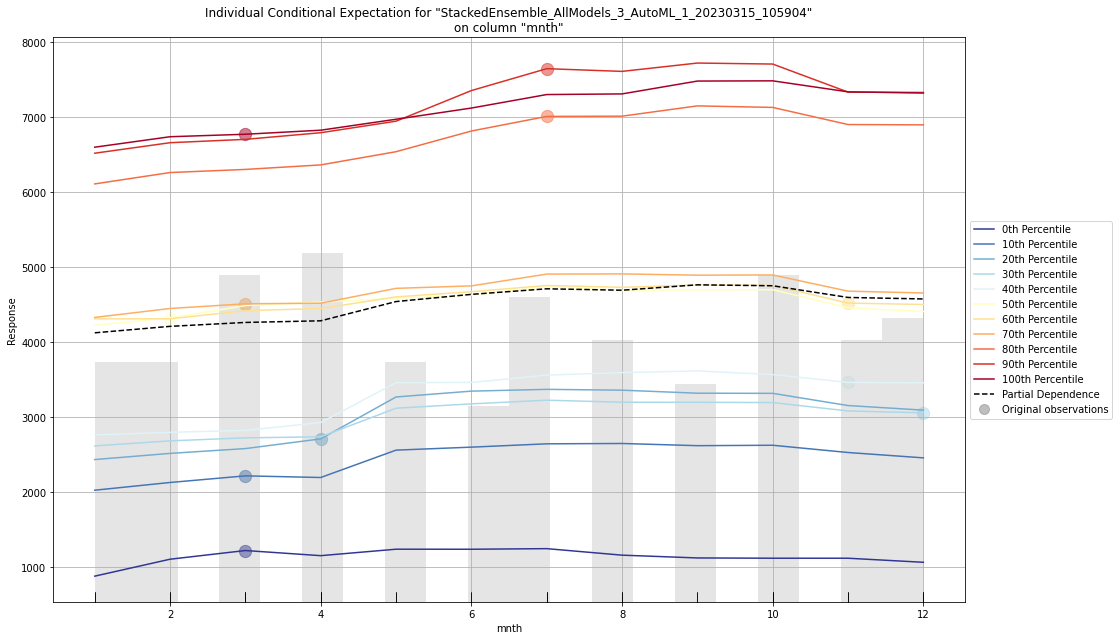

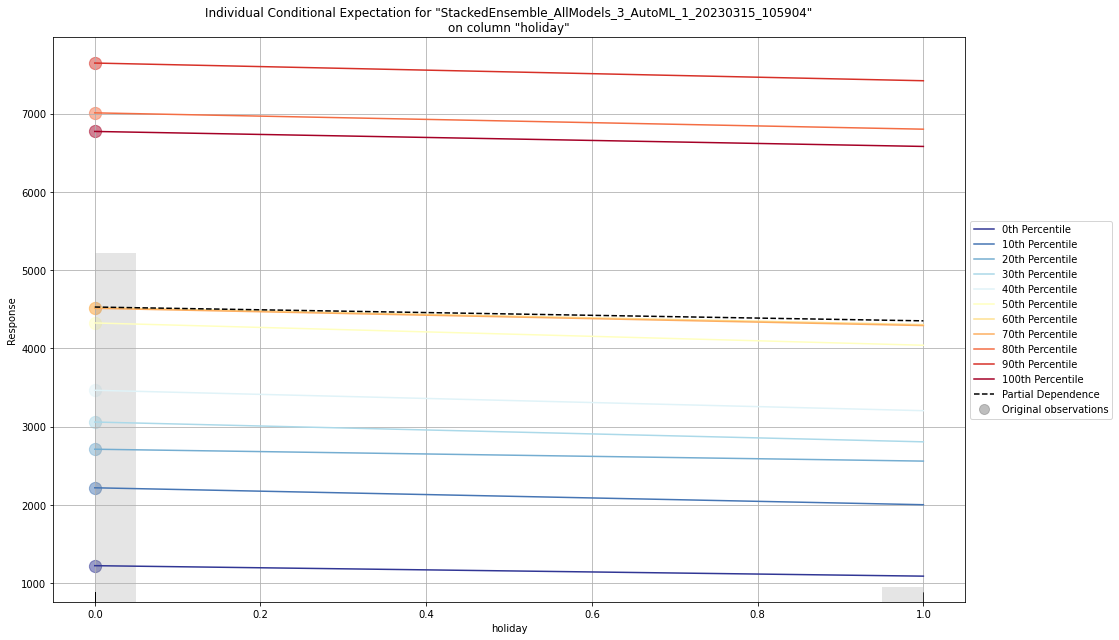

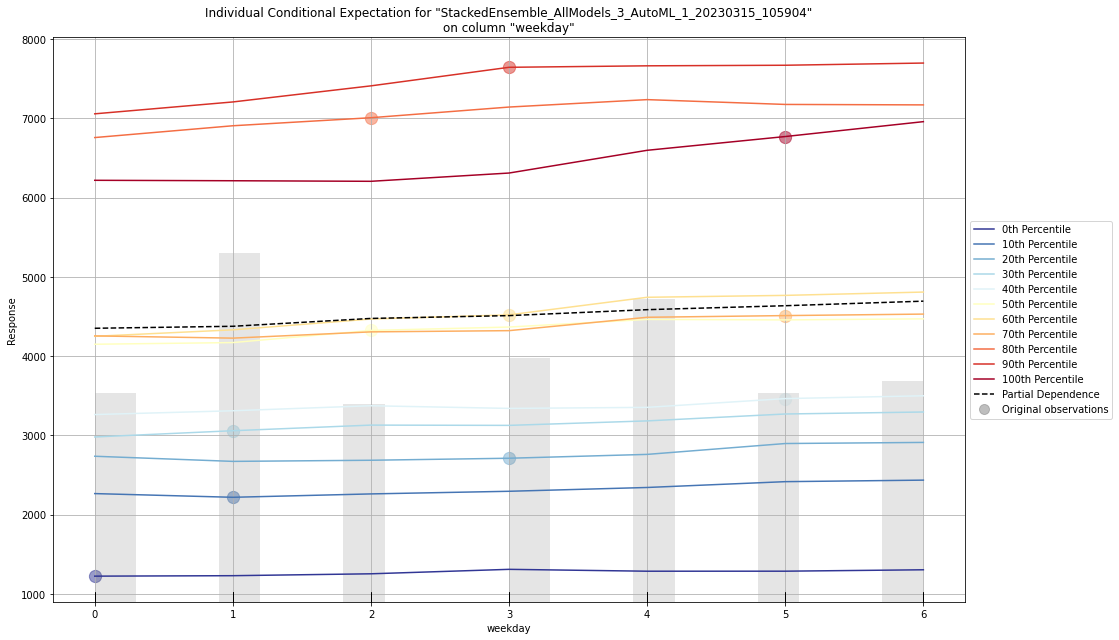

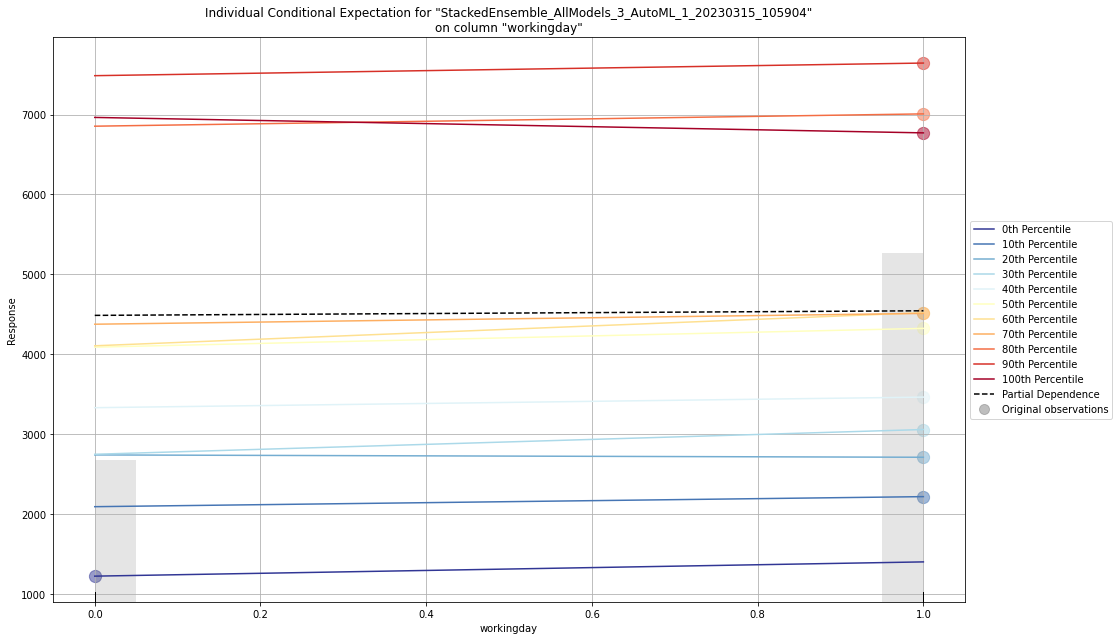

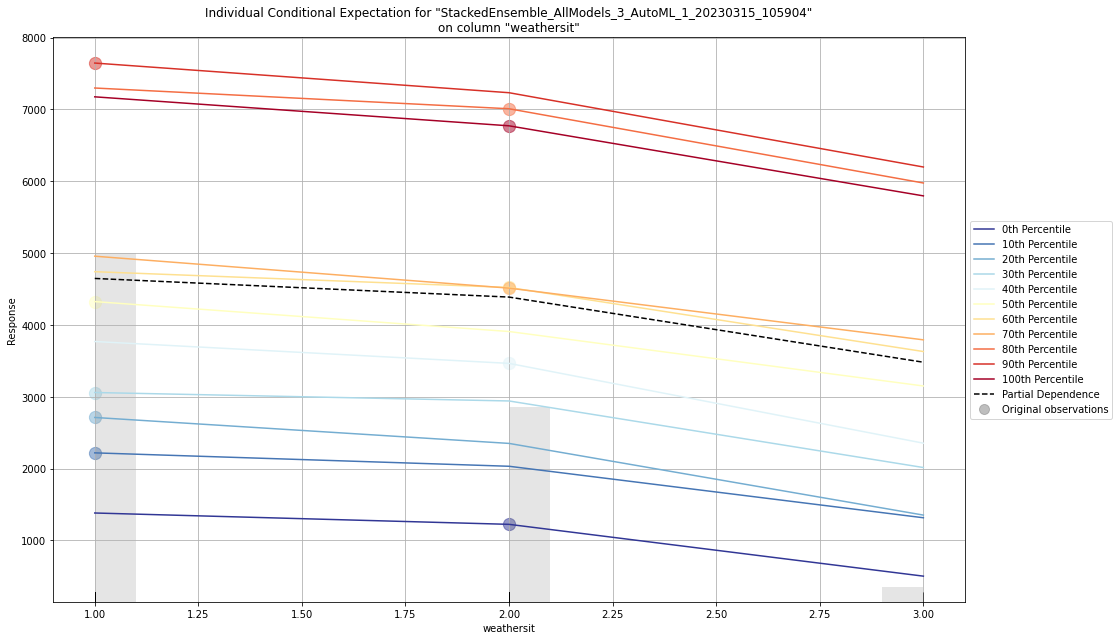

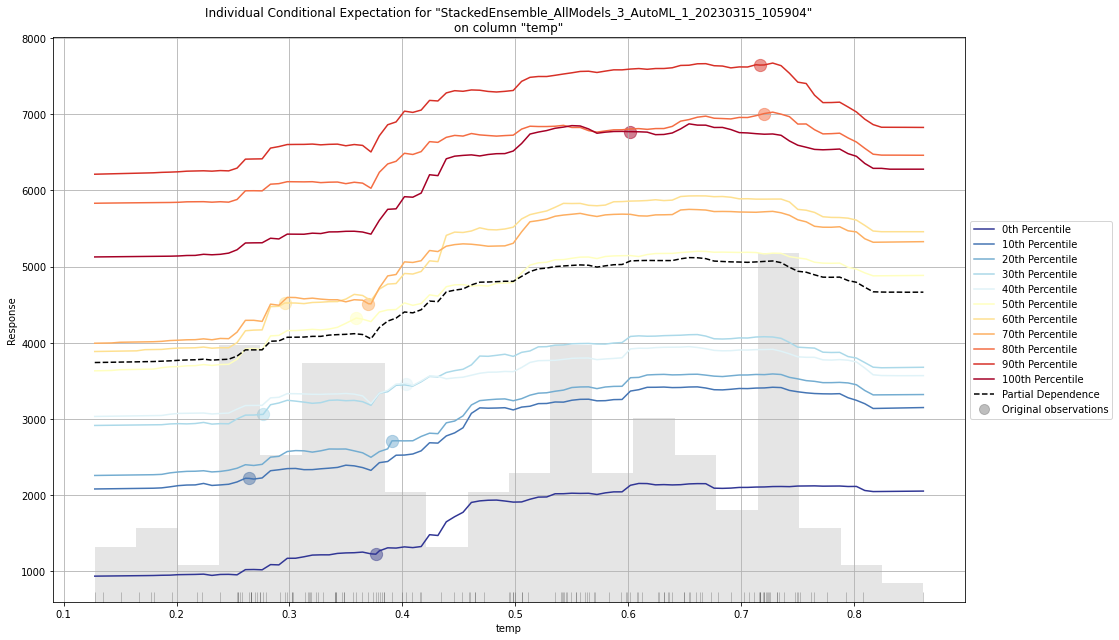

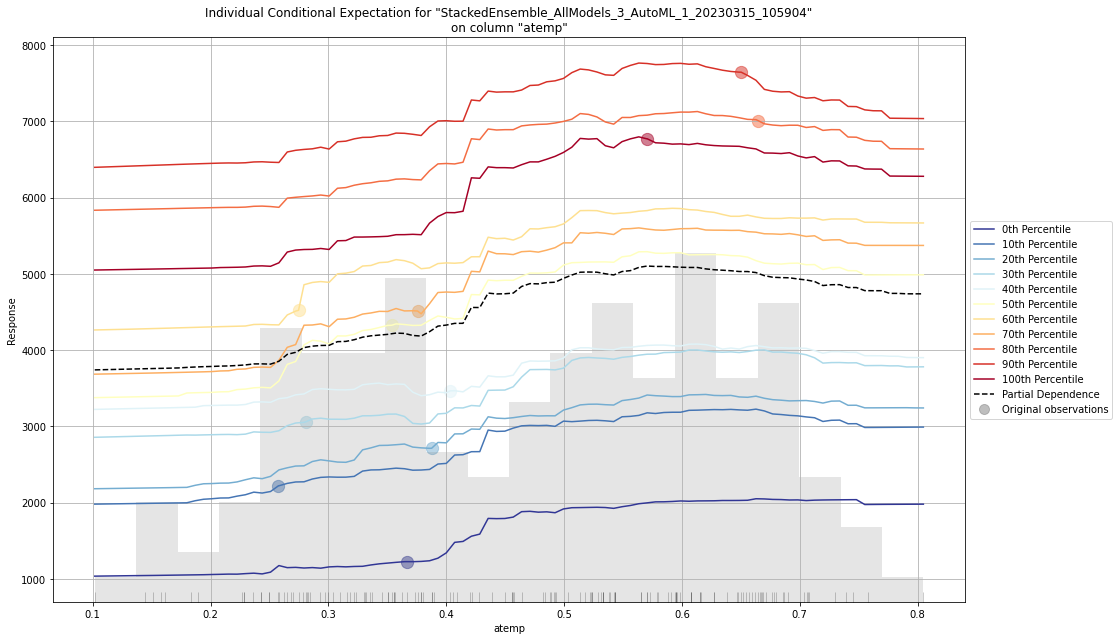

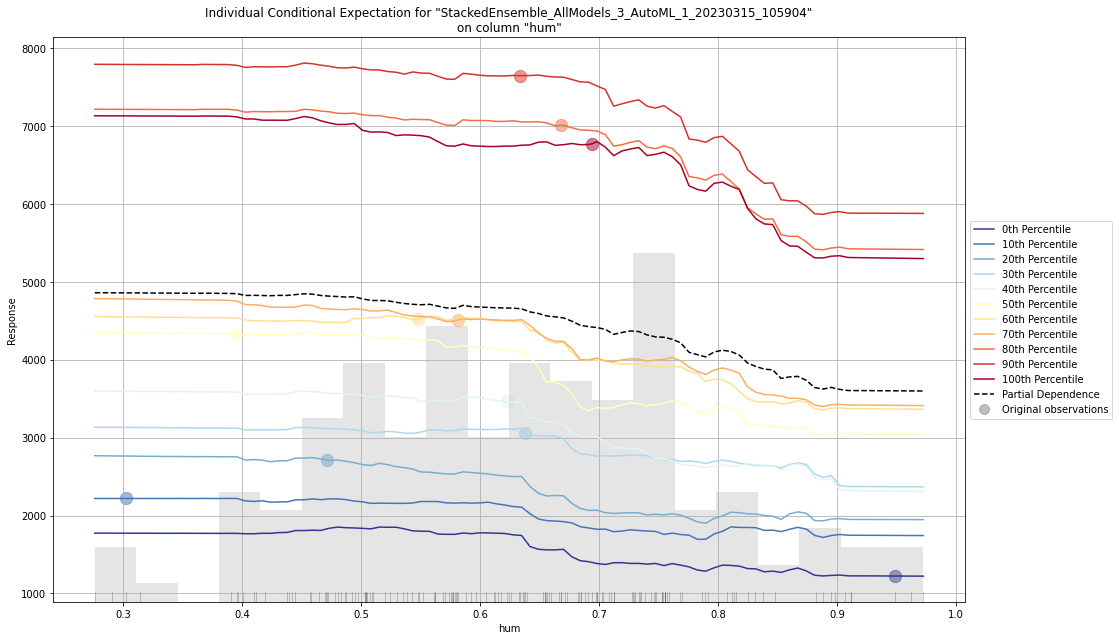

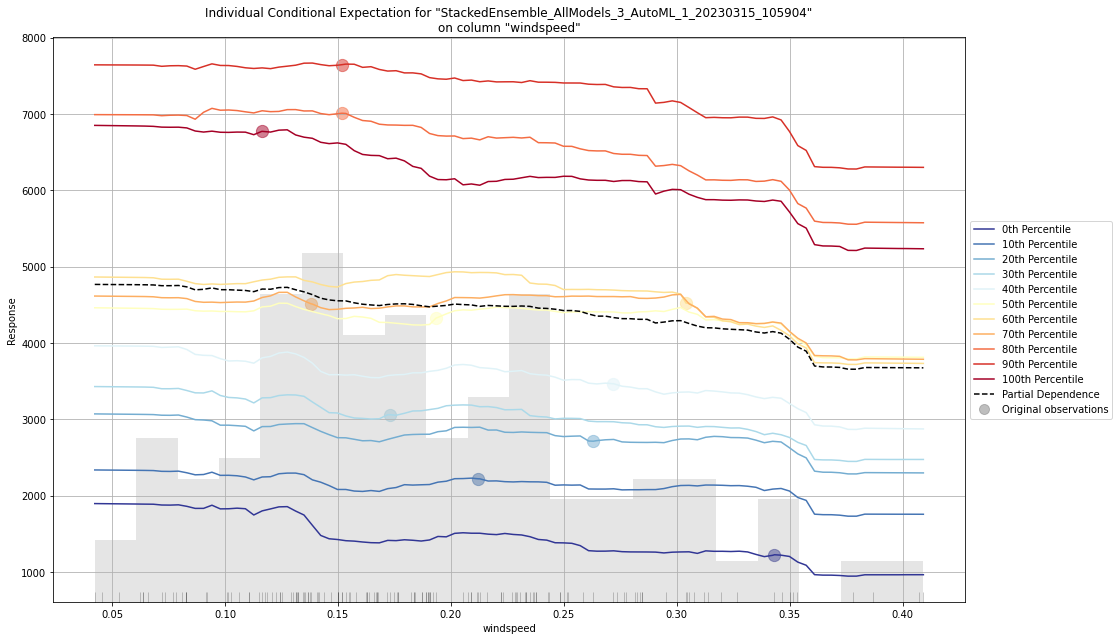

In [9]:
# Explain a single H2O model (e.g. leader model from AutoML)
exm = aml.leader.explain(test)

In [8]:
#As per above stacked ensemble model is the leader model

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

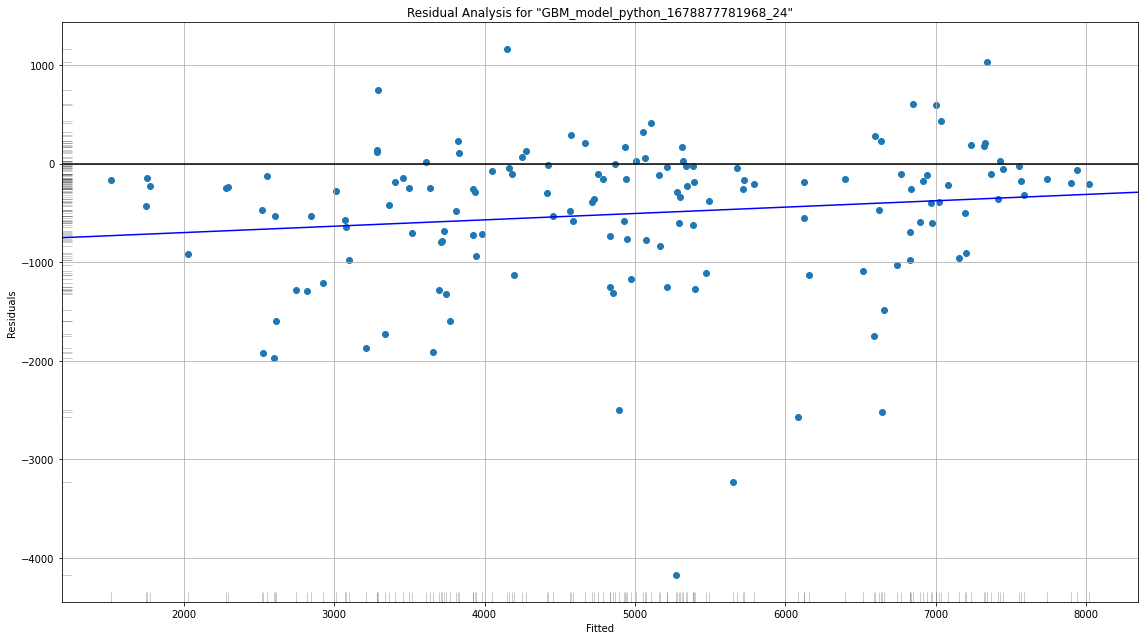

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

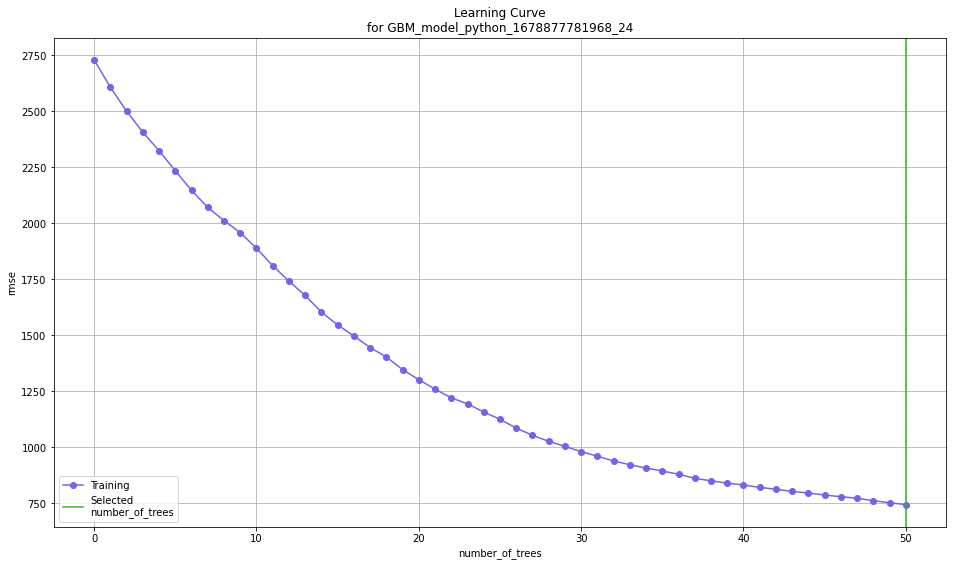

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

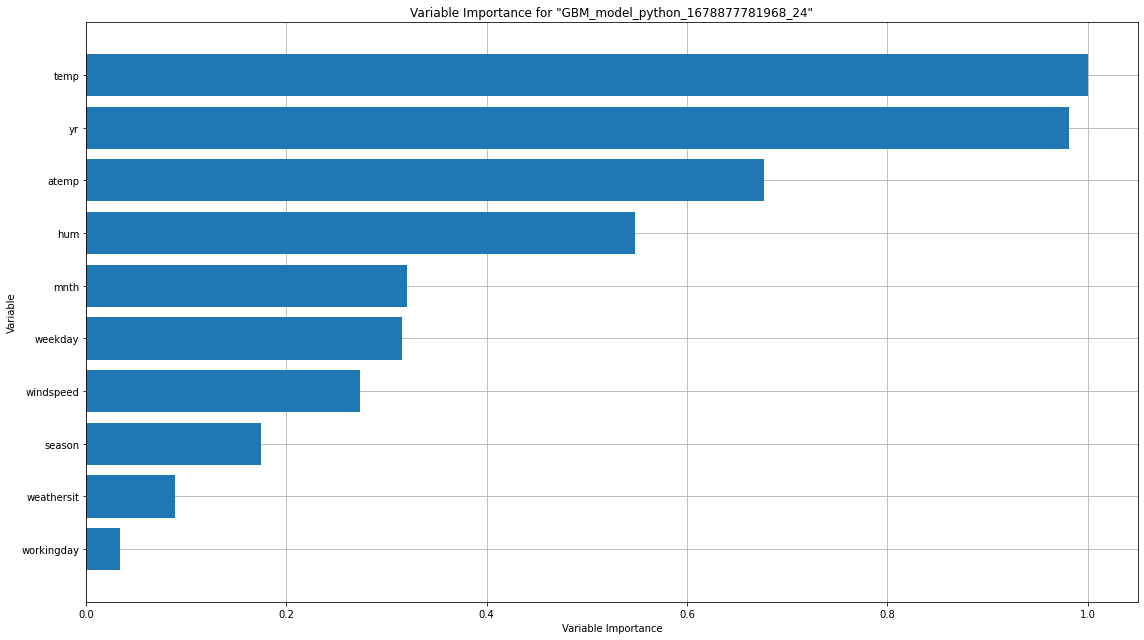

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

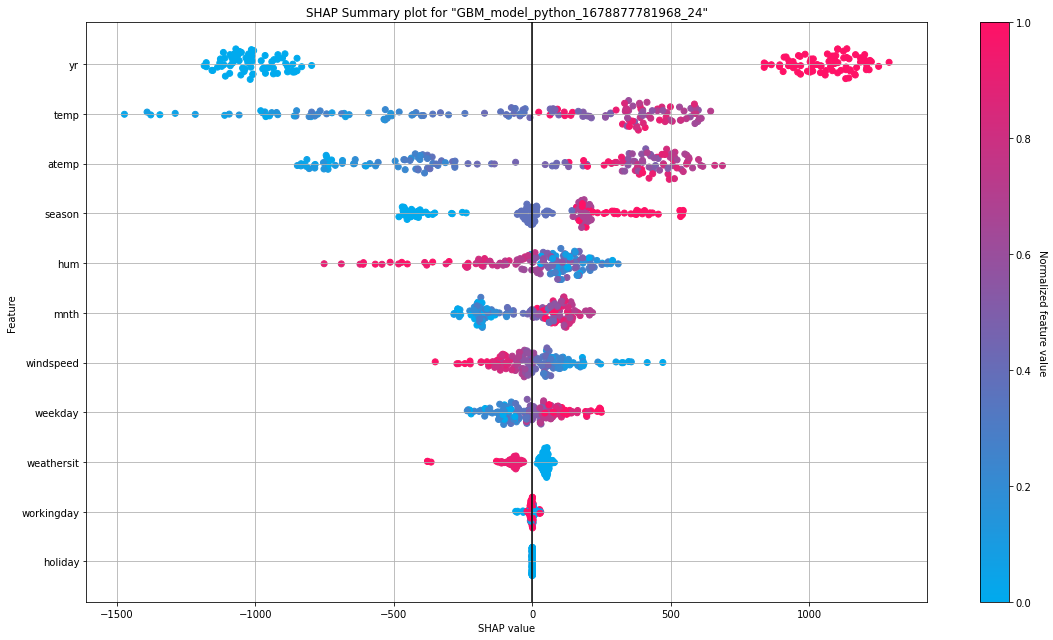

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

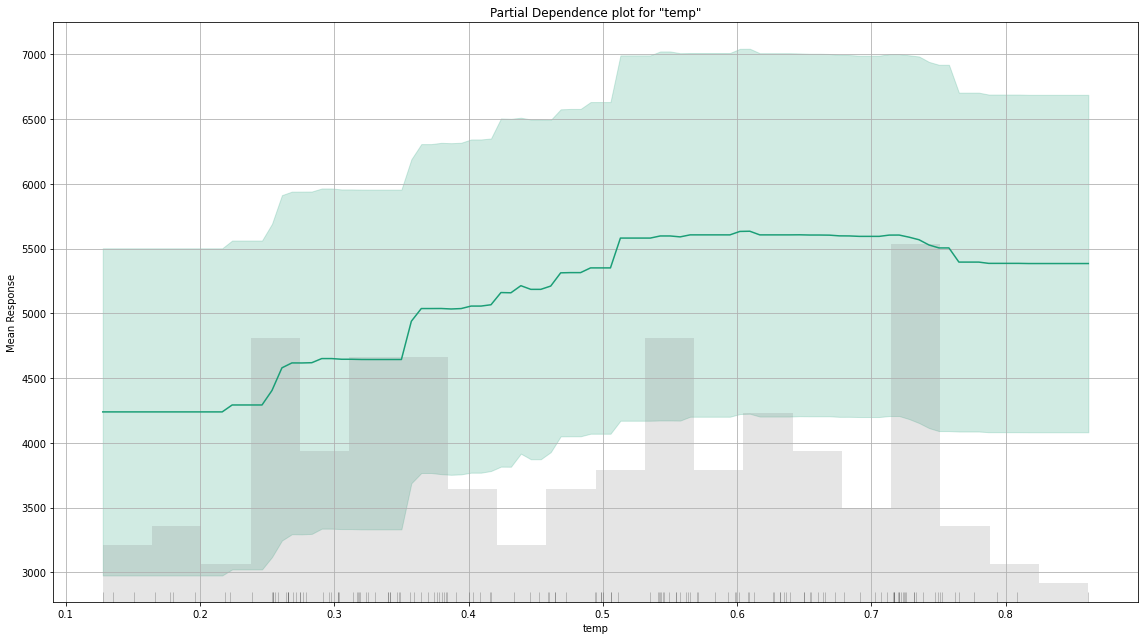

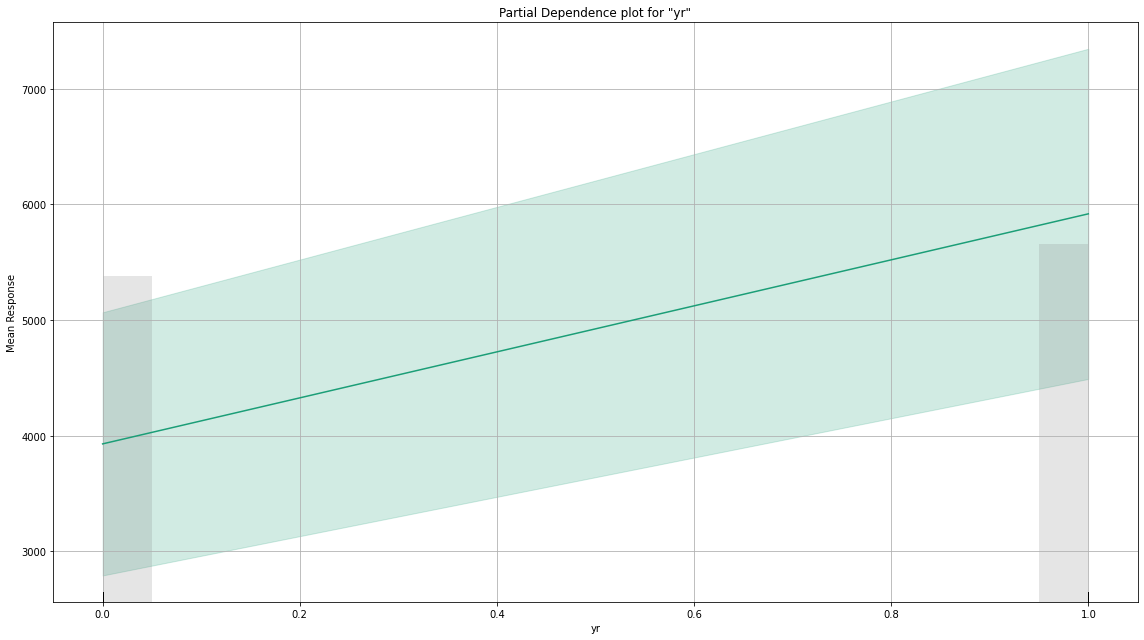

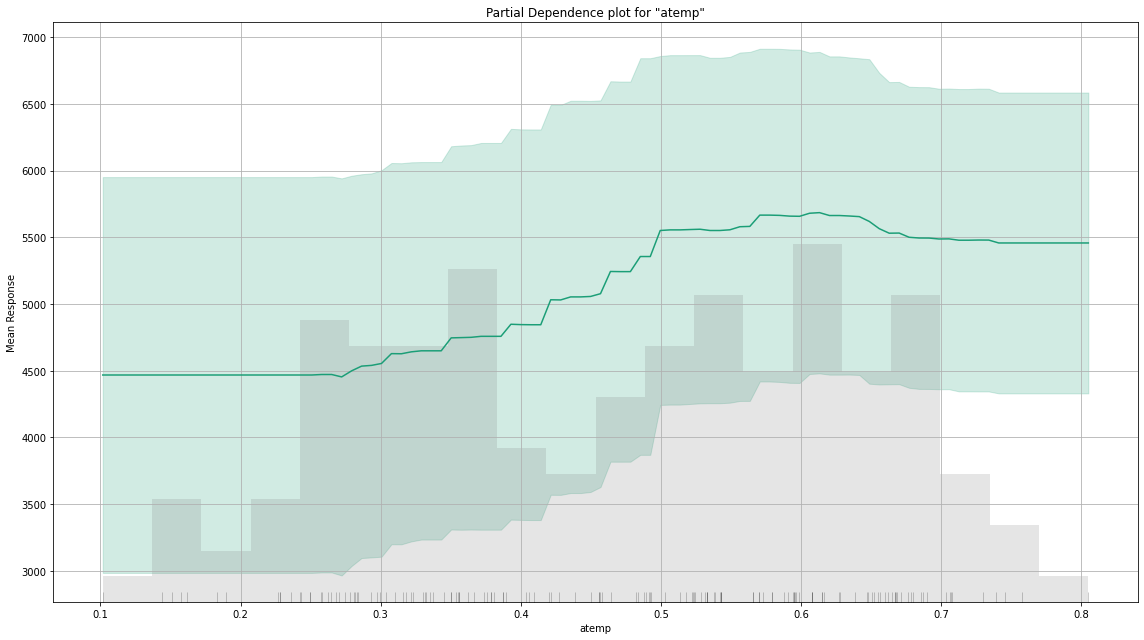

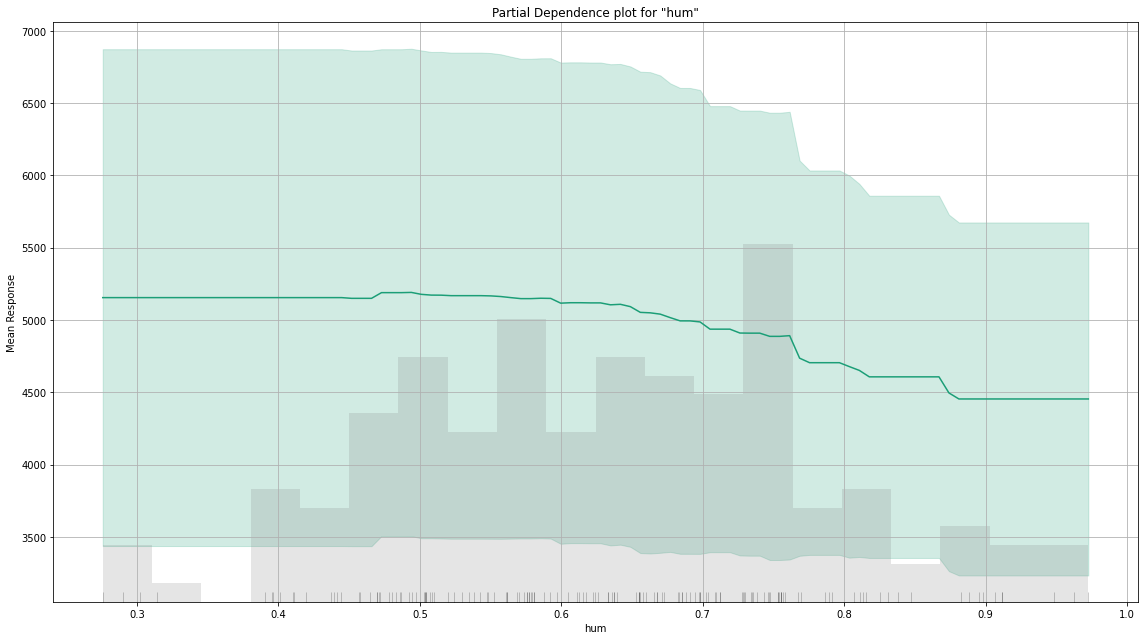

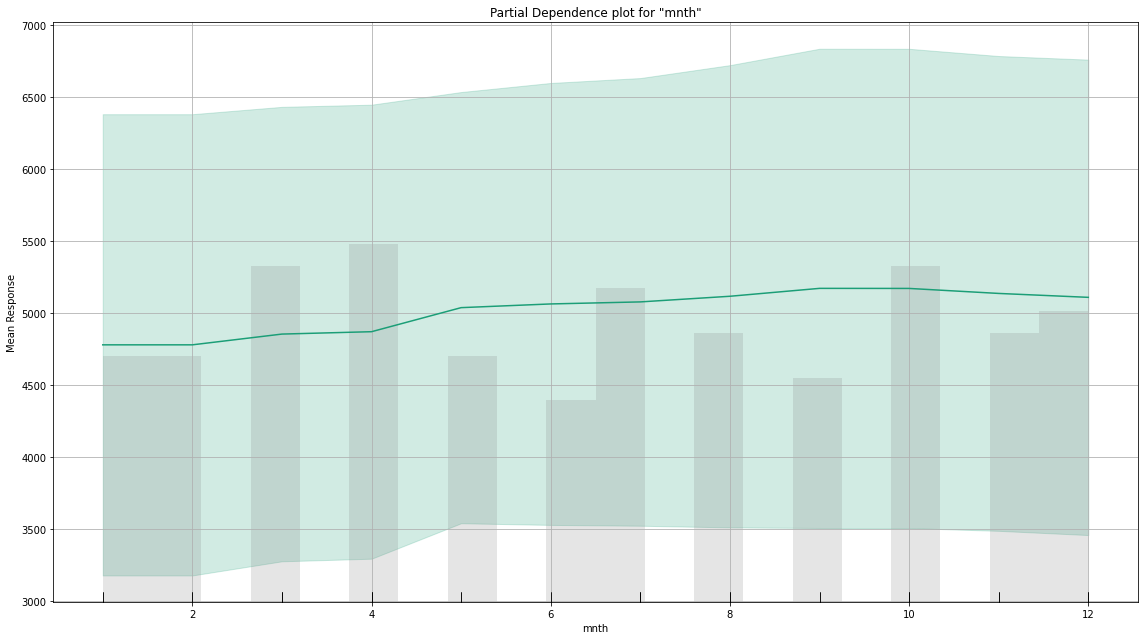

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

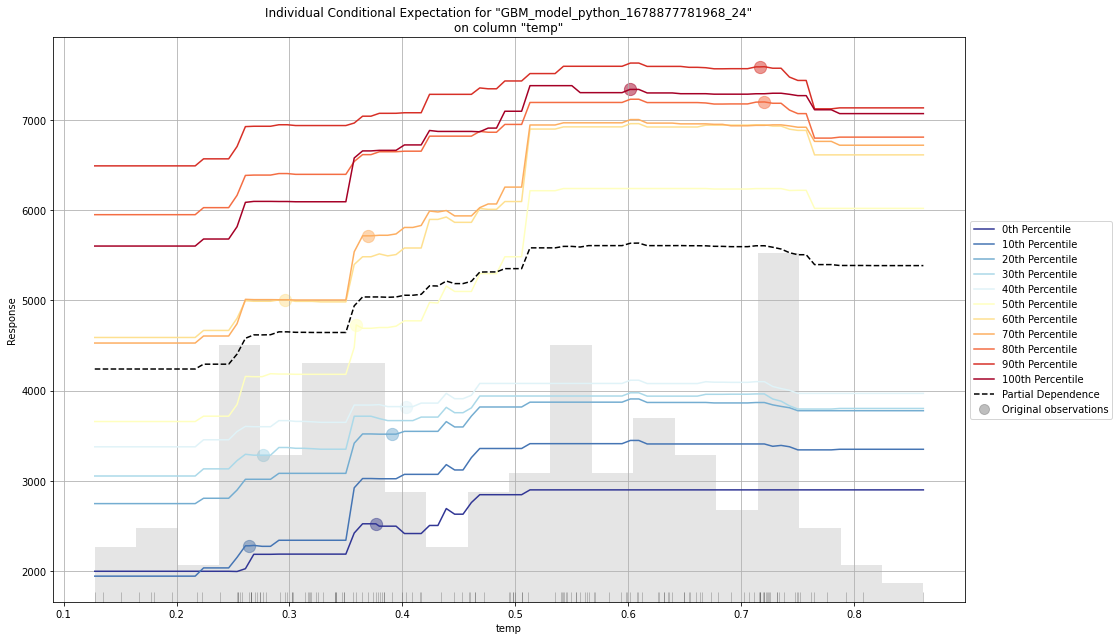

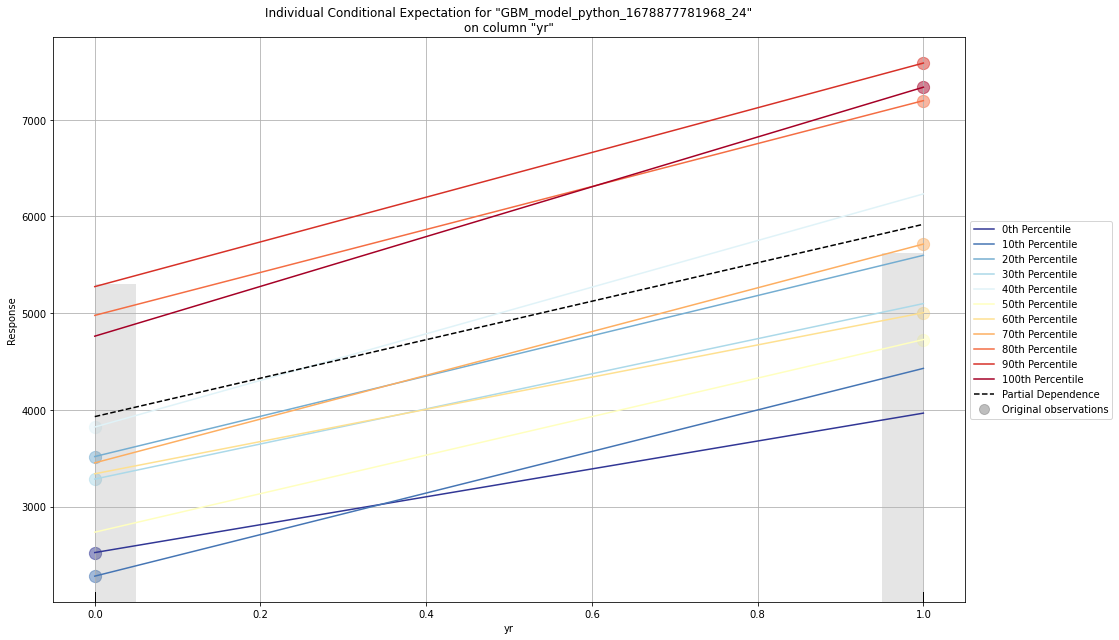

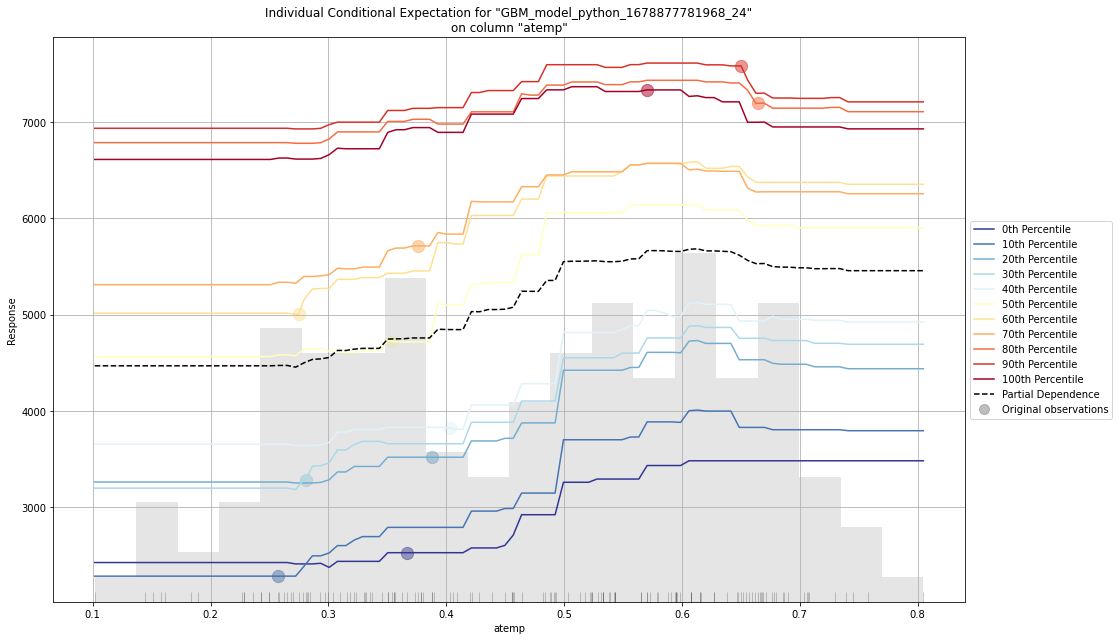

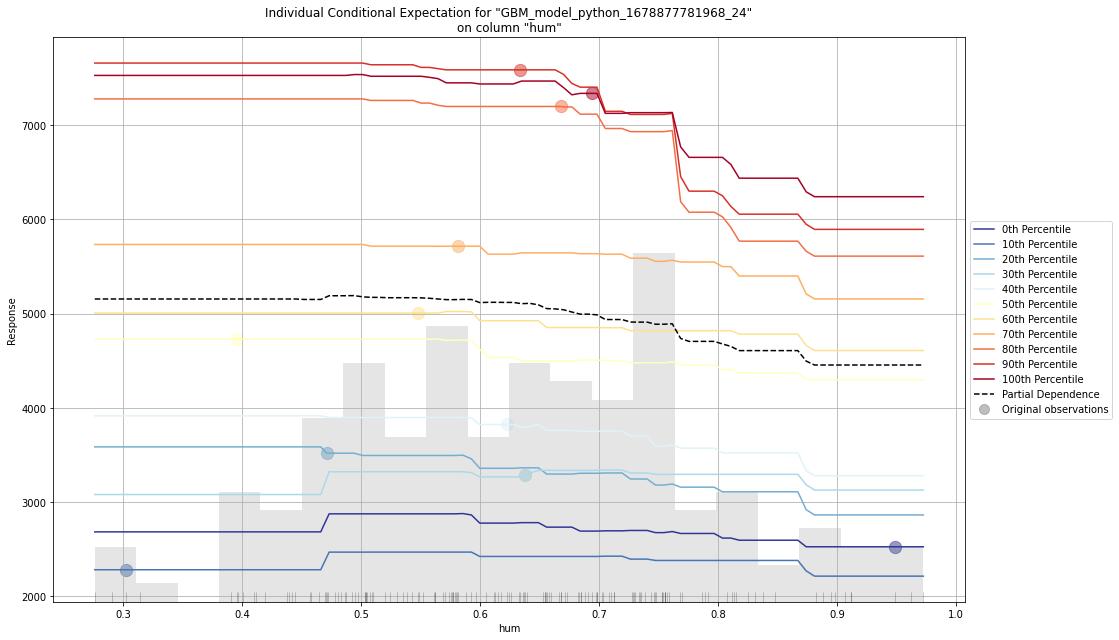

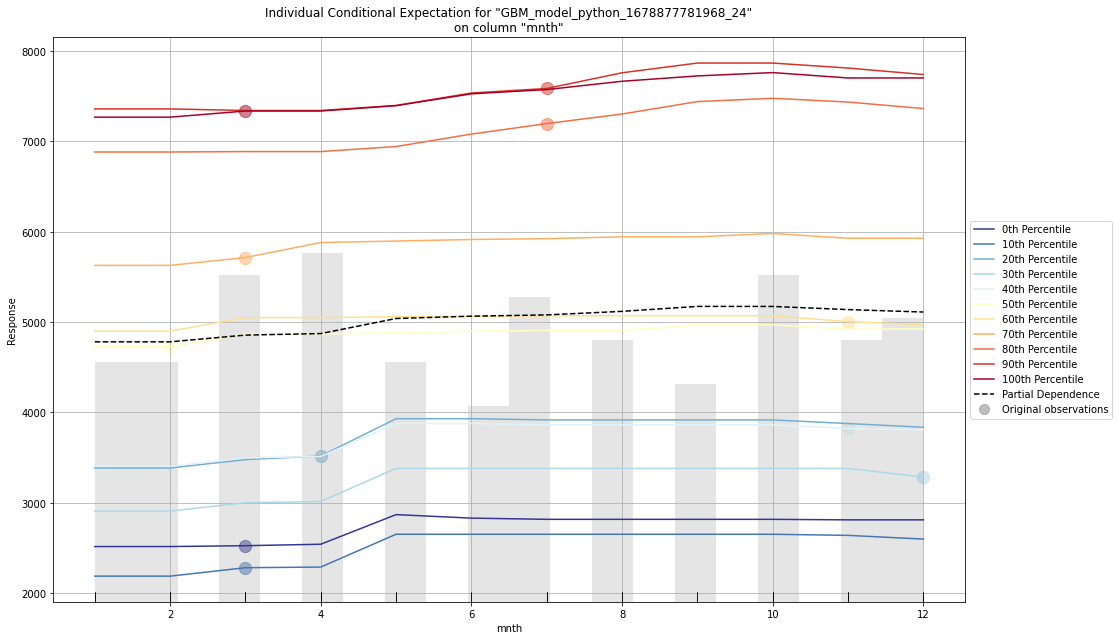

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [11]:
#Using H2OGradientBoostingEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
gbm = H2OGradientBoostingEstimator(distribution="quantile", quantile_alpha=0.8)
gbm.train(x=x,y="cnt", training_frame=train)
gbm.explain(test)

In [12]:
#As per Gradient Boosting Estimator temperature has more influence followed by year,humidity,month on the target variable

In [ ]:
%%shell
jupyter nbconvert --to html ///content/explainableAI_day_H20.ipynb

[NbConvertApp] Converting notebook ///content/explainableAI_day_H20.ipynb to html
[NbConvertApp] Writing 4846784 bytes to /content/explainableAI_day_H20.html
